# 🔹UFC Exploratory Data Analysis 

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
logger = logging.getLogger(__name__)

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root))
from src.helpers import *
from src.data import UFCData

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Data

In [2]:
# Load the cleaned dataset
file_path = os.path.abspath(os.path.join(project_root, 'data', 'processed', 'ufc_etl.csv'))

# Load the CSV into a DataFrame
try:
    ufc_df = pd.read_csv(file_path)
    logger.info(f"✅ Data successfully loaded: {ufc_df.shape[0]} rows, {ufc_df.shape[1]} columns.")
except Exception as e:
    logger.error(f"❌ Error loading training data: {e}")

[INFO] ✅ Data successfully loaded: 5594 rows, 345 columns.


# Initialize UFCData object

In [3]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 5594
🧪 Train/Test split  : 4475 / 1119
🧪 Total features     : 344

🔢 Numerical features : 325
🔠 Categorical features: 19
    - Binary          : 1
    - Multiclass      : 18

🏷 Label distribution (raw):
   - Class 0: 3391 (60.6%)
   - Class 1: 2203 (39.4%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                               mean      std     min       max
title_fight                   0.060    0.237    0.00     1.000
finish_round                  2.457    1.039    1.00     5.000
match_time_sec              229.610   91.478    5.00   300.000
total_rounds                  3.247    0.658    3.00     5.000
r_kd                          0.247    0.519    0.00     4.000
r_sig_str_landed             42.006   34.733    0.00   445.000
r_sig_str_atmpted            92.072   74.948    0.00   744.000
r_sig_str_acc                47.375   15.431    0.00   100.000
r_total_str_lande

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Initial Data Exploration

In [4]:
# View the first few rows of the training data
ufc_df.head()

event_id                           event_name        date  \
0  d2b1c1317a39f6c6             UFC 25: Ultimate Japan 3  2000-04-14   
1  08ae5cd9aef7ddd3         UFC 29: Defense of the Belts  2000-12-16   
2  2b1587a3376ab743      UFC 30: Battle on the Boardwalk  2001-02-23   
3  7b9aa973e5c04624  UFC 32: Showdown in the Meadowlands  2001-06-29   
4  c75b99887c8c3f5a             UFC 33: Victory in Vegas  2001-09-28   

                           location          fight_id           division  \
0                      Tokyo, Japan  0adfdf8f563be462  light heavyweight   
1                      Tokyo, Japan  9ea4087371f7a892       middleweight   
2    Atlantic City, New Jersey, USA  f8820294bbe01486  light heavyweight   
3  East Rutherford, New Jersey, USA  40dbe22895f98978  light heavyweight   
4            Las Vegas, Nevada, USA  ea64af61ed03453f  light heavyweight   

   title_fight                method  finish_round  match_time_sec  ...  \
0            1  Decision - Unanimous             5             300  ...   
1            0  Decision - Unanimous             3             300  ...   
2            1                KO/TKO             1              32  ...   
3            1                KO/TKO             1             212  ...   
4            1  Decision - Unanimous             5             300  ...   

   b_landed_body_per_last_3 b_landed_body_per_last_5 b_landed_leg_per_last_3  \
0                 26.000000                26.000000               50.000000   
1                 32.000000                32.000000                3.000000   
2                 23.666667                23.666667               15.666667   
3                 50.000000                50.000000               50.000000   
4                 29.000000                29.000000                0.000000   

  b_landed_leg_per_last_5  b_landed_dist_per_last_3  b_landed_dist_per_last_5  \
0               50.000000                      50.0                      50.0   
1                3.000000                       0.0                       0.0   
2               15.666667                      20.0                      20.0   
3               50.000000                     100.0                     100.0   
4                0.000000                       5.0                       5.0   

   b_landed_clinch_per_last_3  b_landed_clinch_per_last_5  \
0                        48.0                        48.0   
1                         9.0                         9.0   
2                        27.0                        27.0   
3                         0.0                         0.0   
4                         5.0                         5.0   

   b_landed_ground_per_last_3  b_landed_ground_per_last_5  
0                         2.0                         2.0  
1                        90.0                        90.0  
2                        52.0                        52.0  
3                         0.0                         0.0  
4                        88.0                        88.0  

[5 rows x 345 columns]

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## Visualizing the Distribution of the Target Variable

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


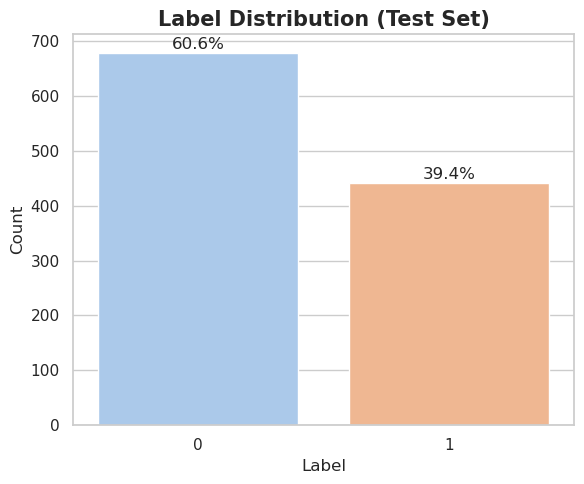

In [5]:
ufc_data.plot_label_distribution(dataset = 'test')

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## Univariate Analysis of Features (X)

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using ca

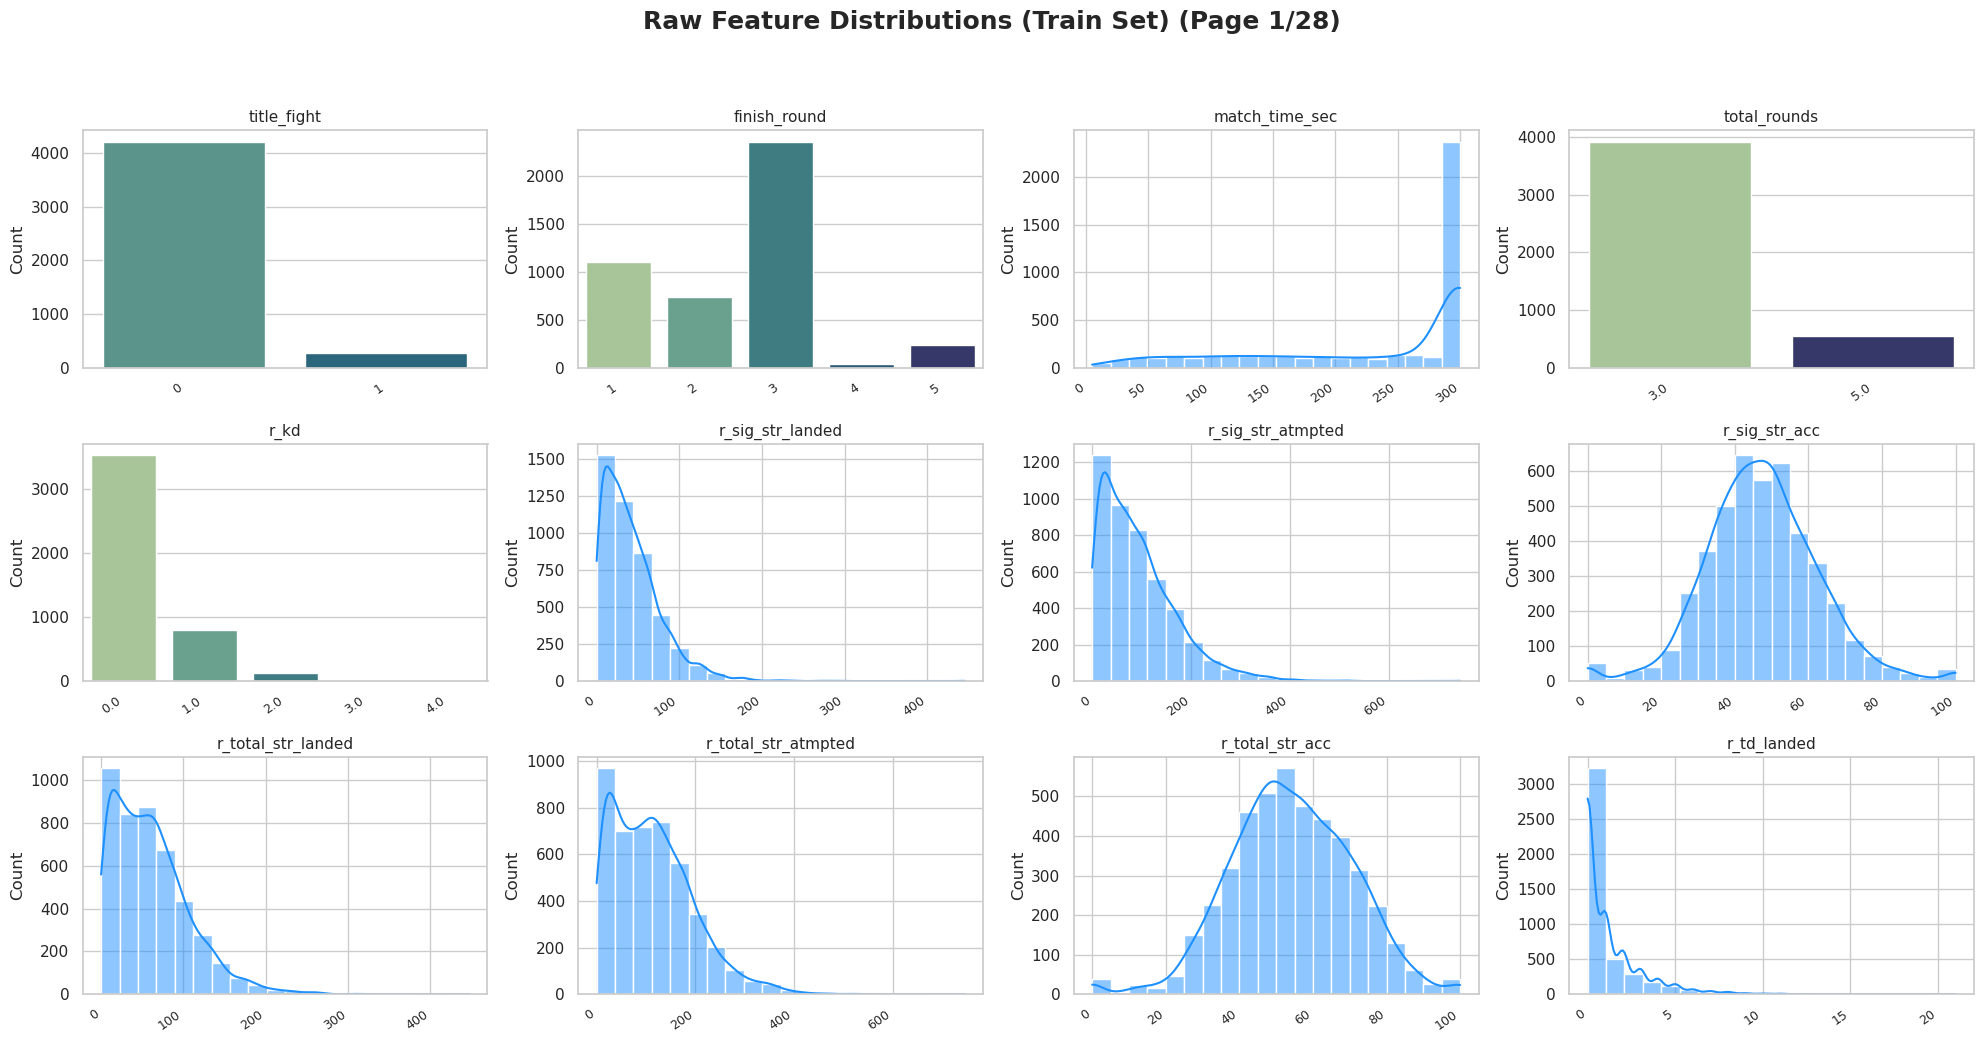

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


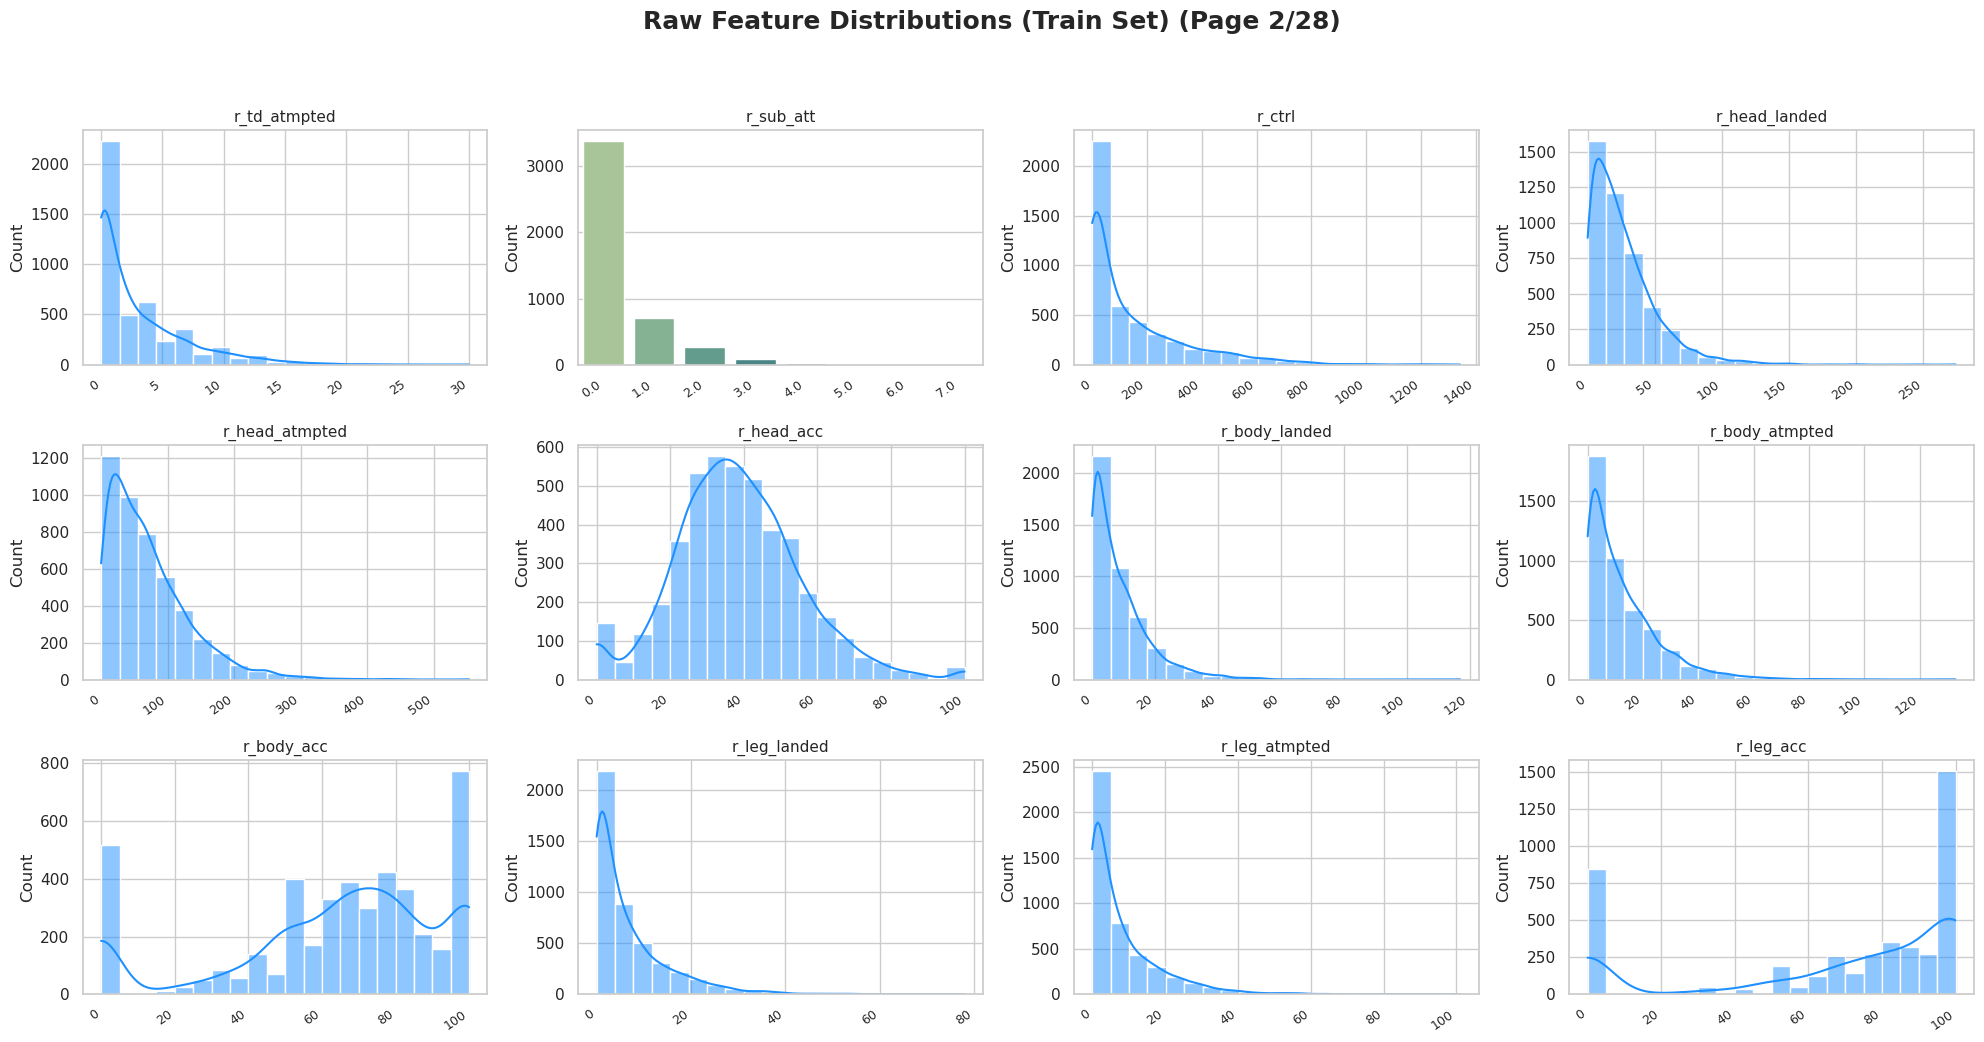

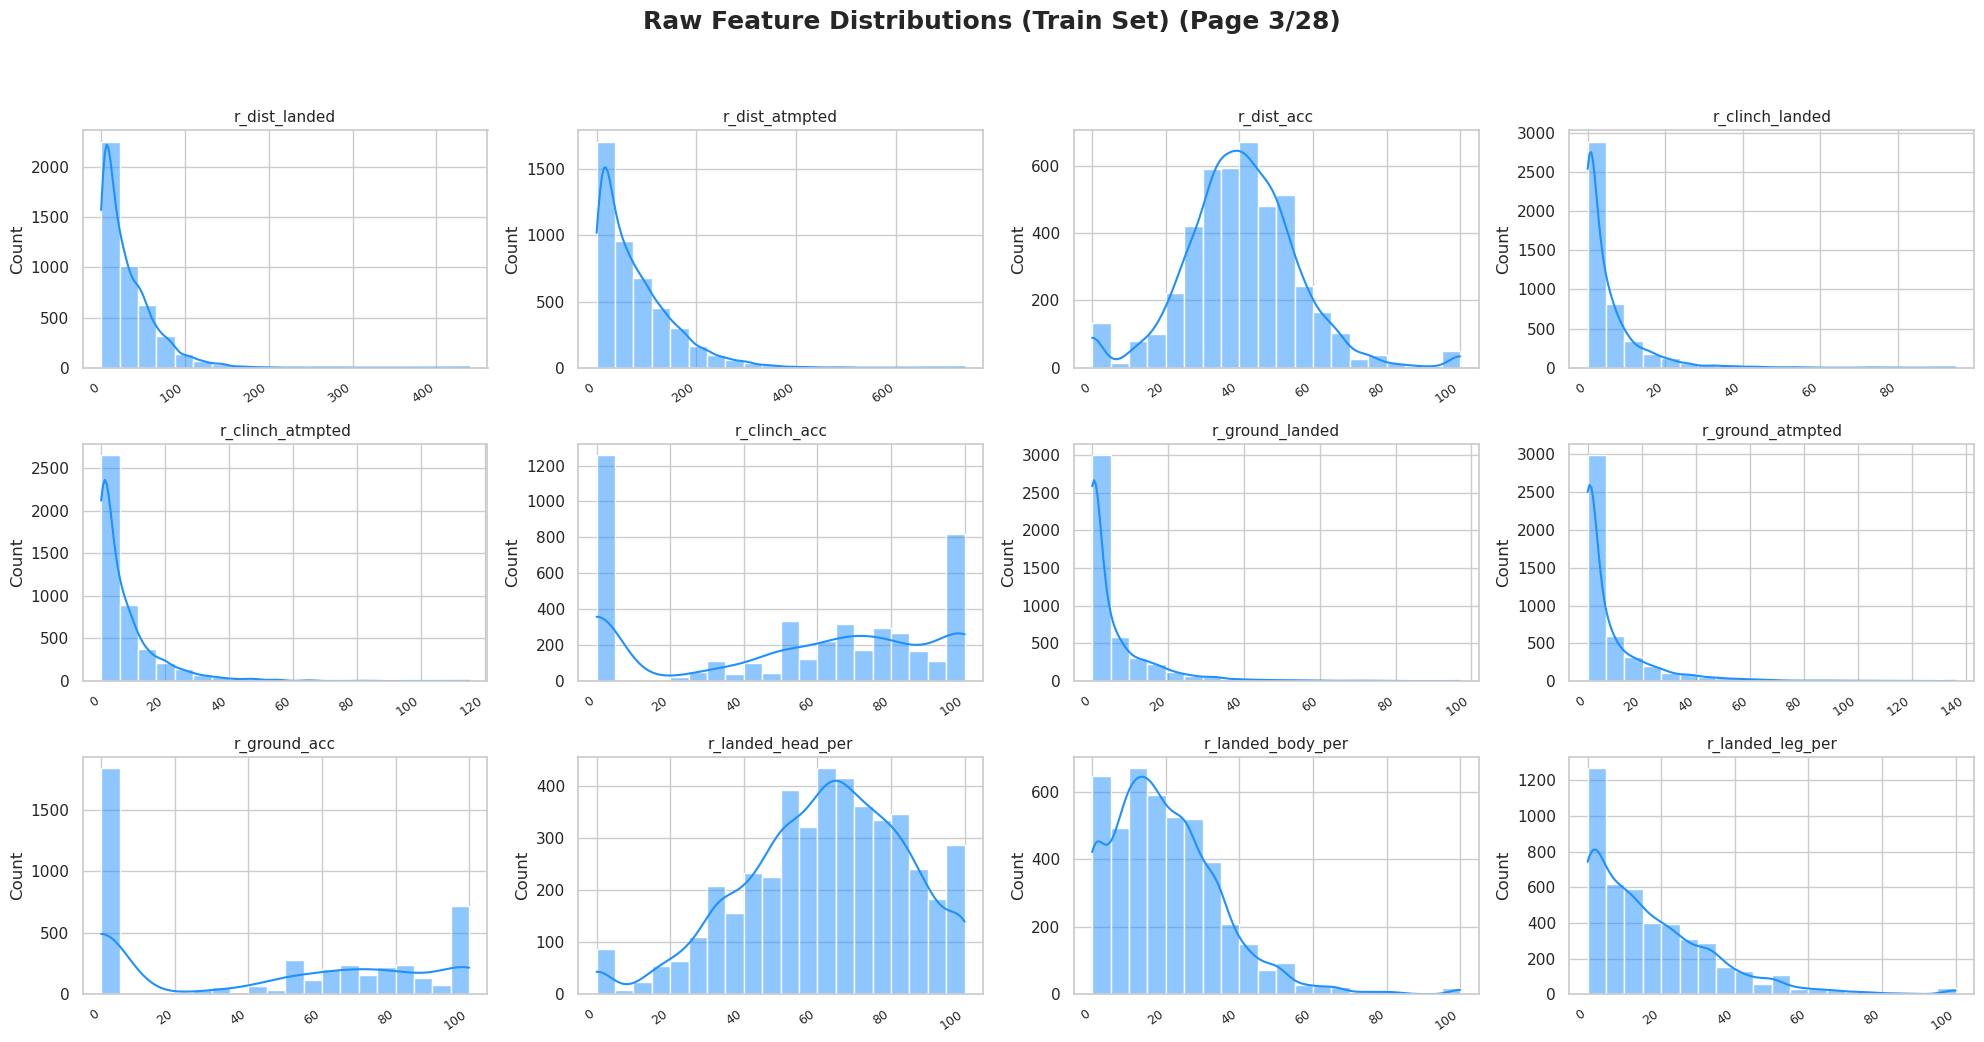

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


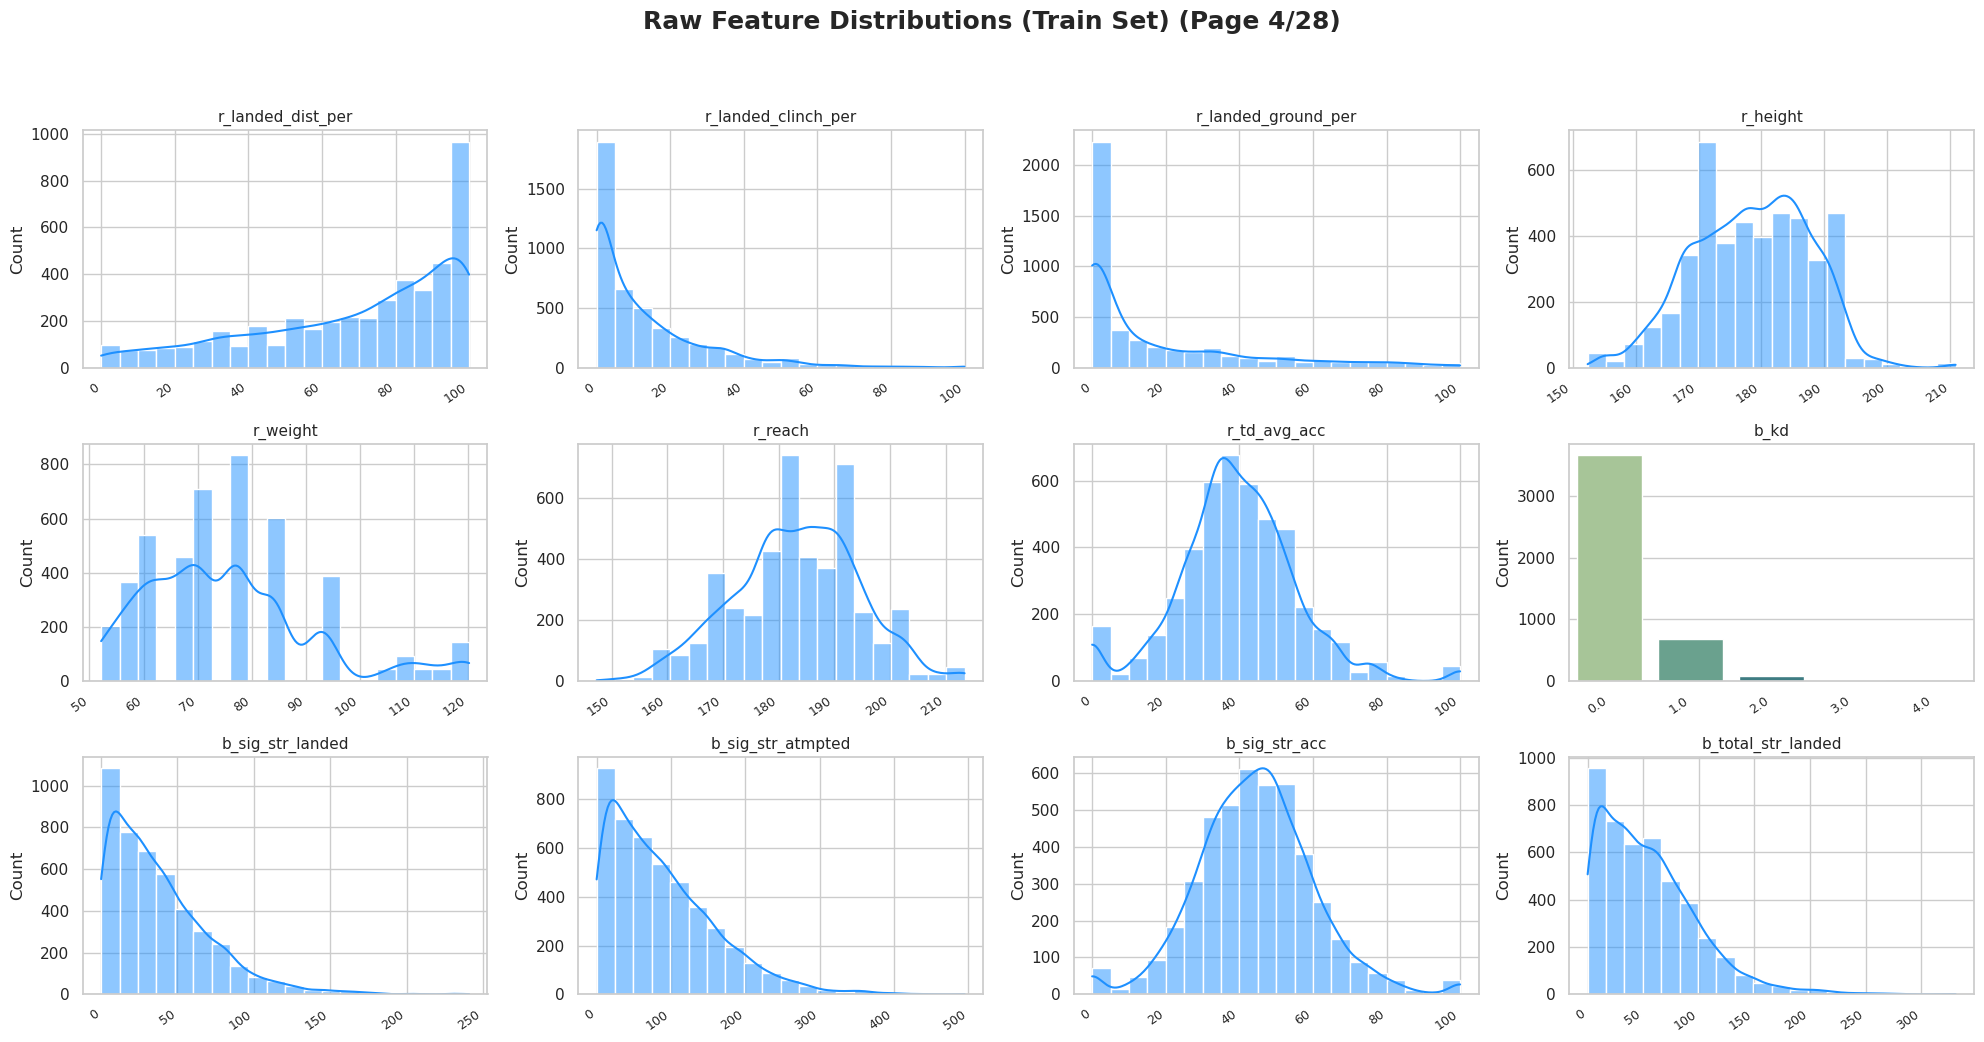

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


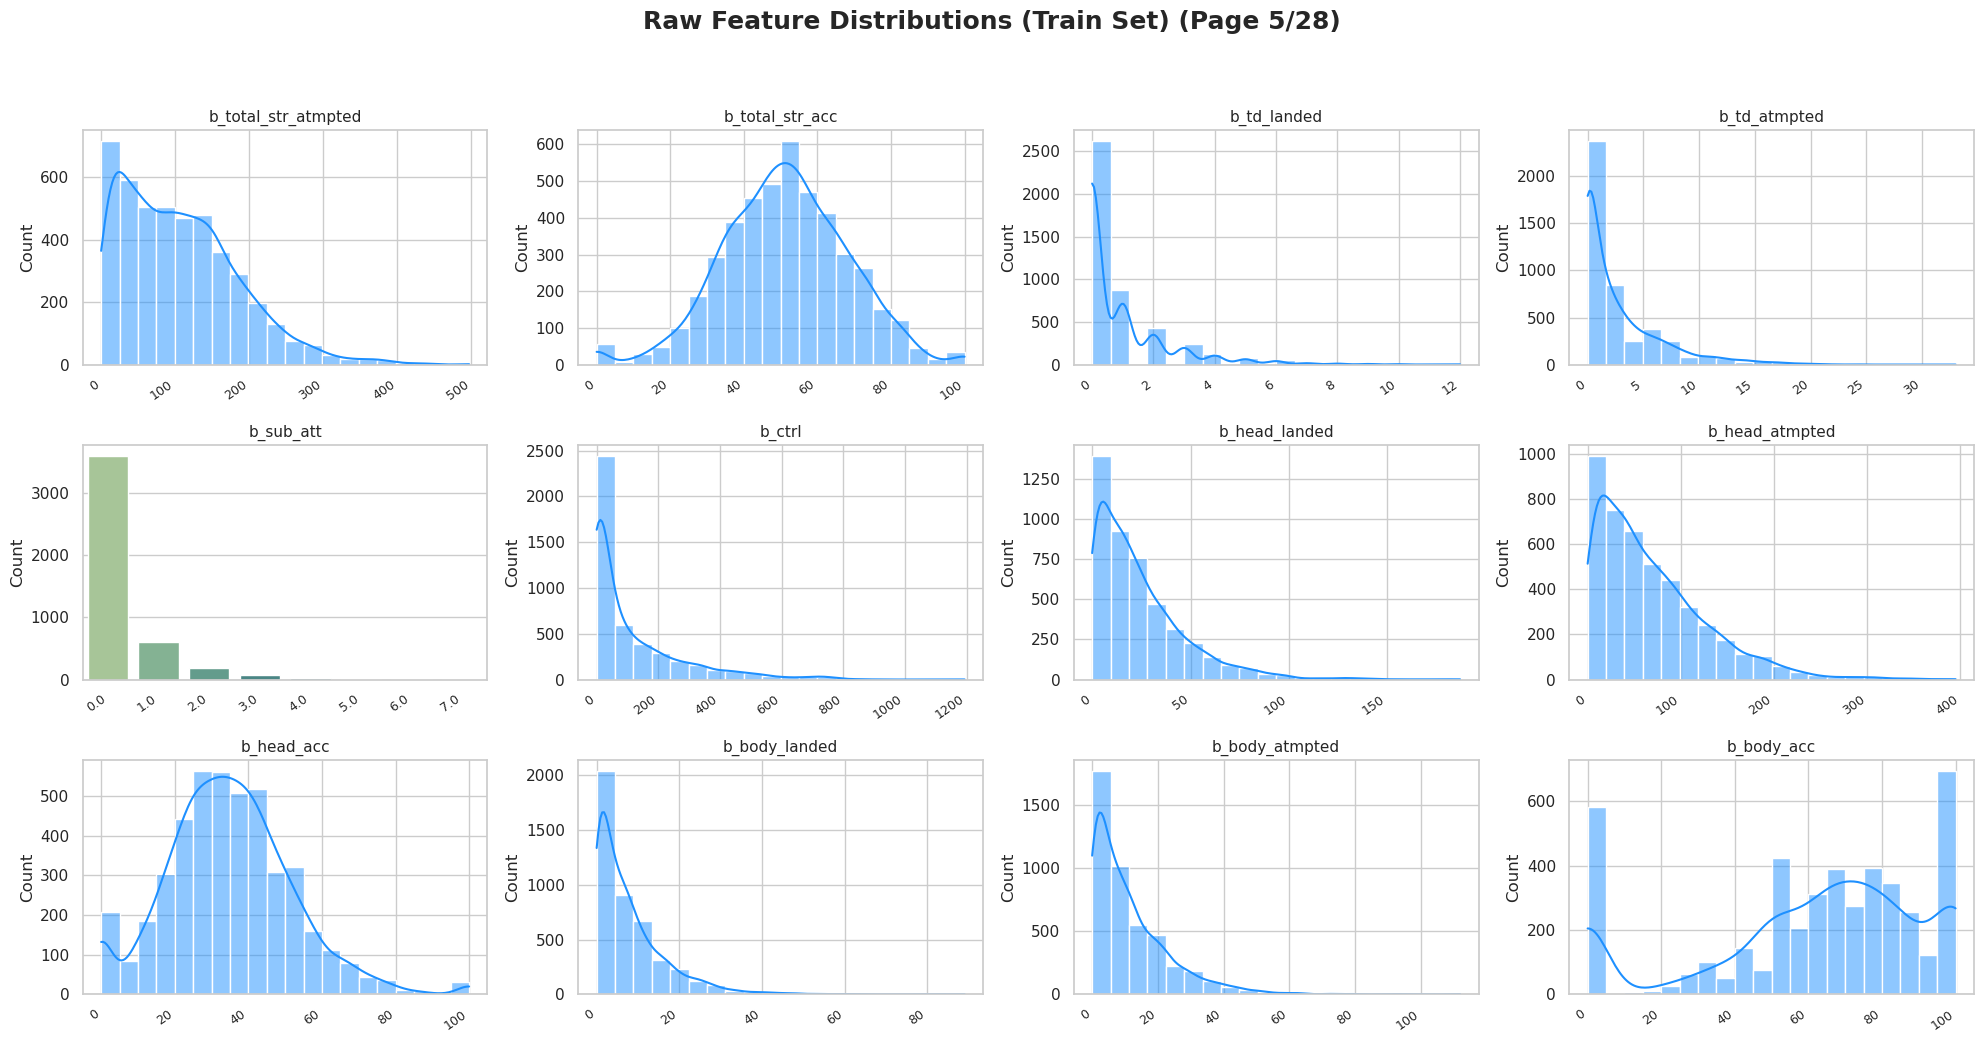

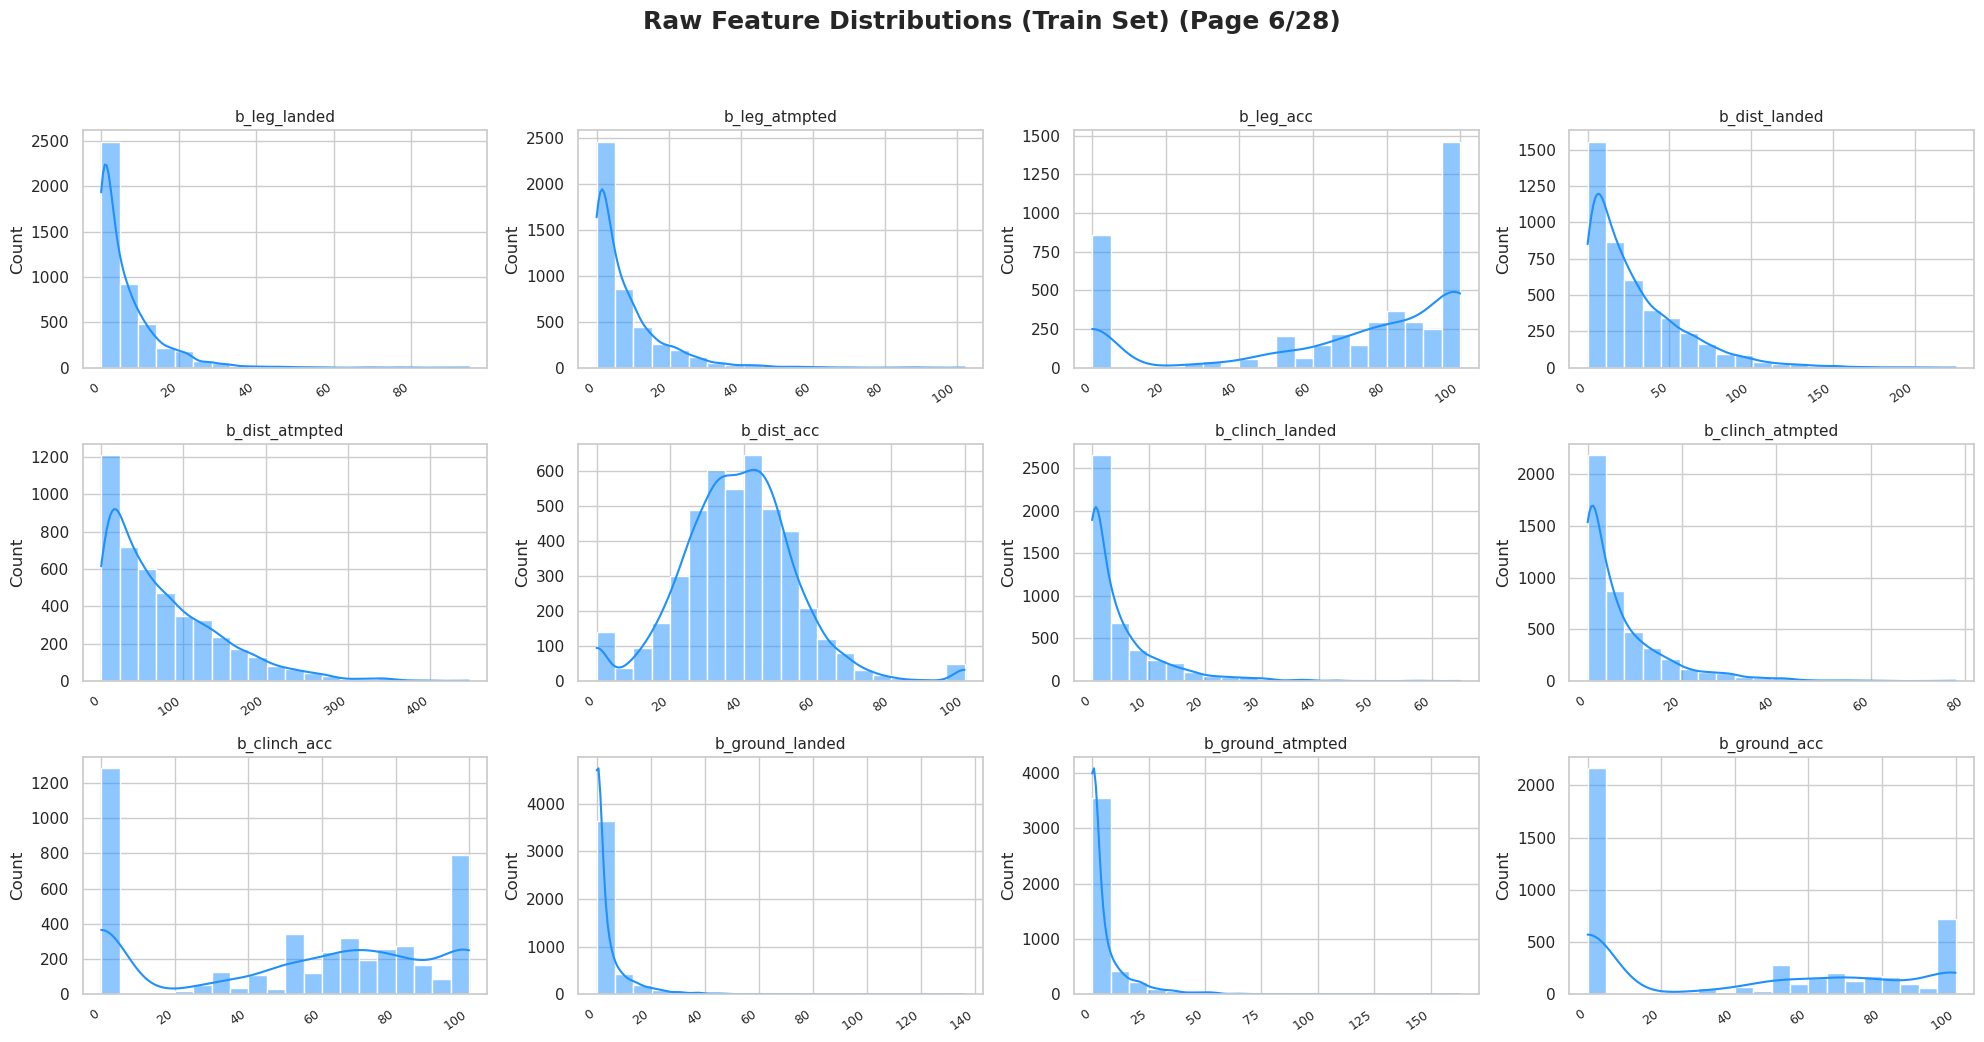

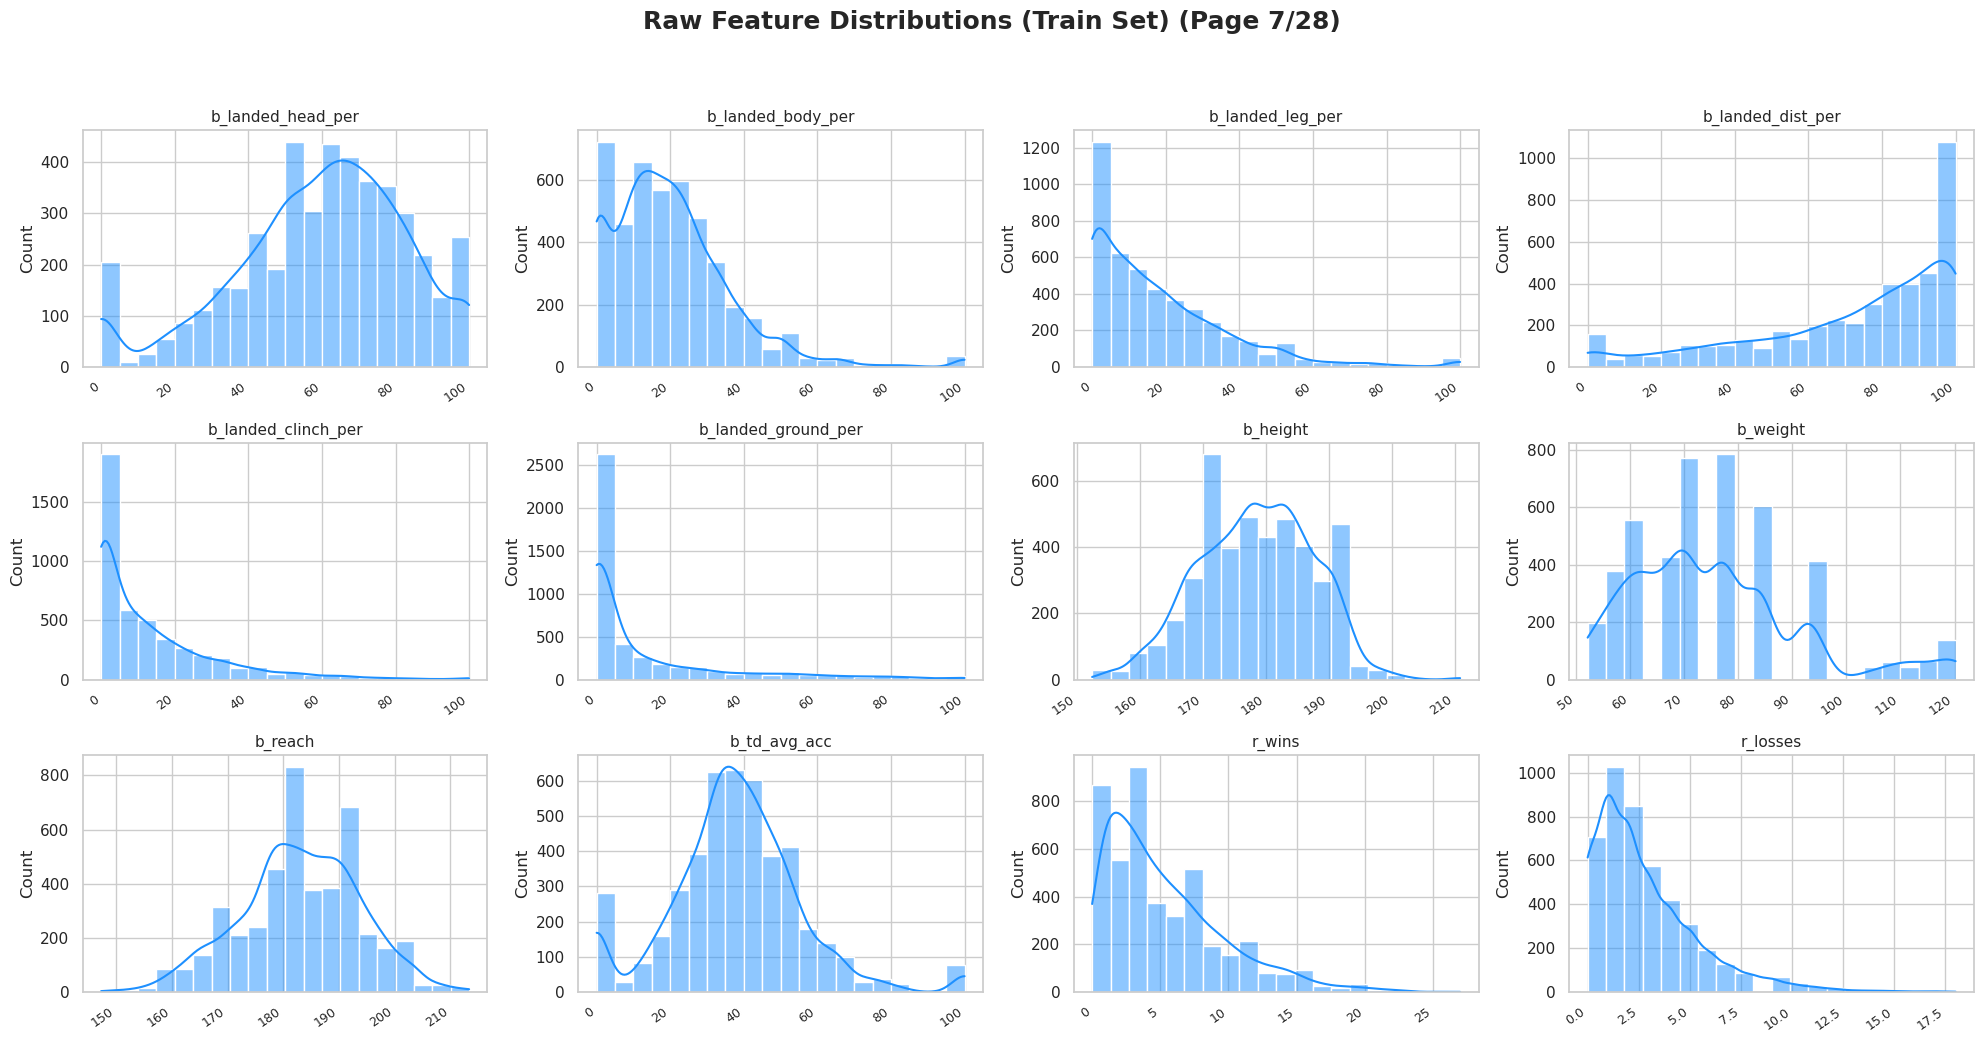

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using ca

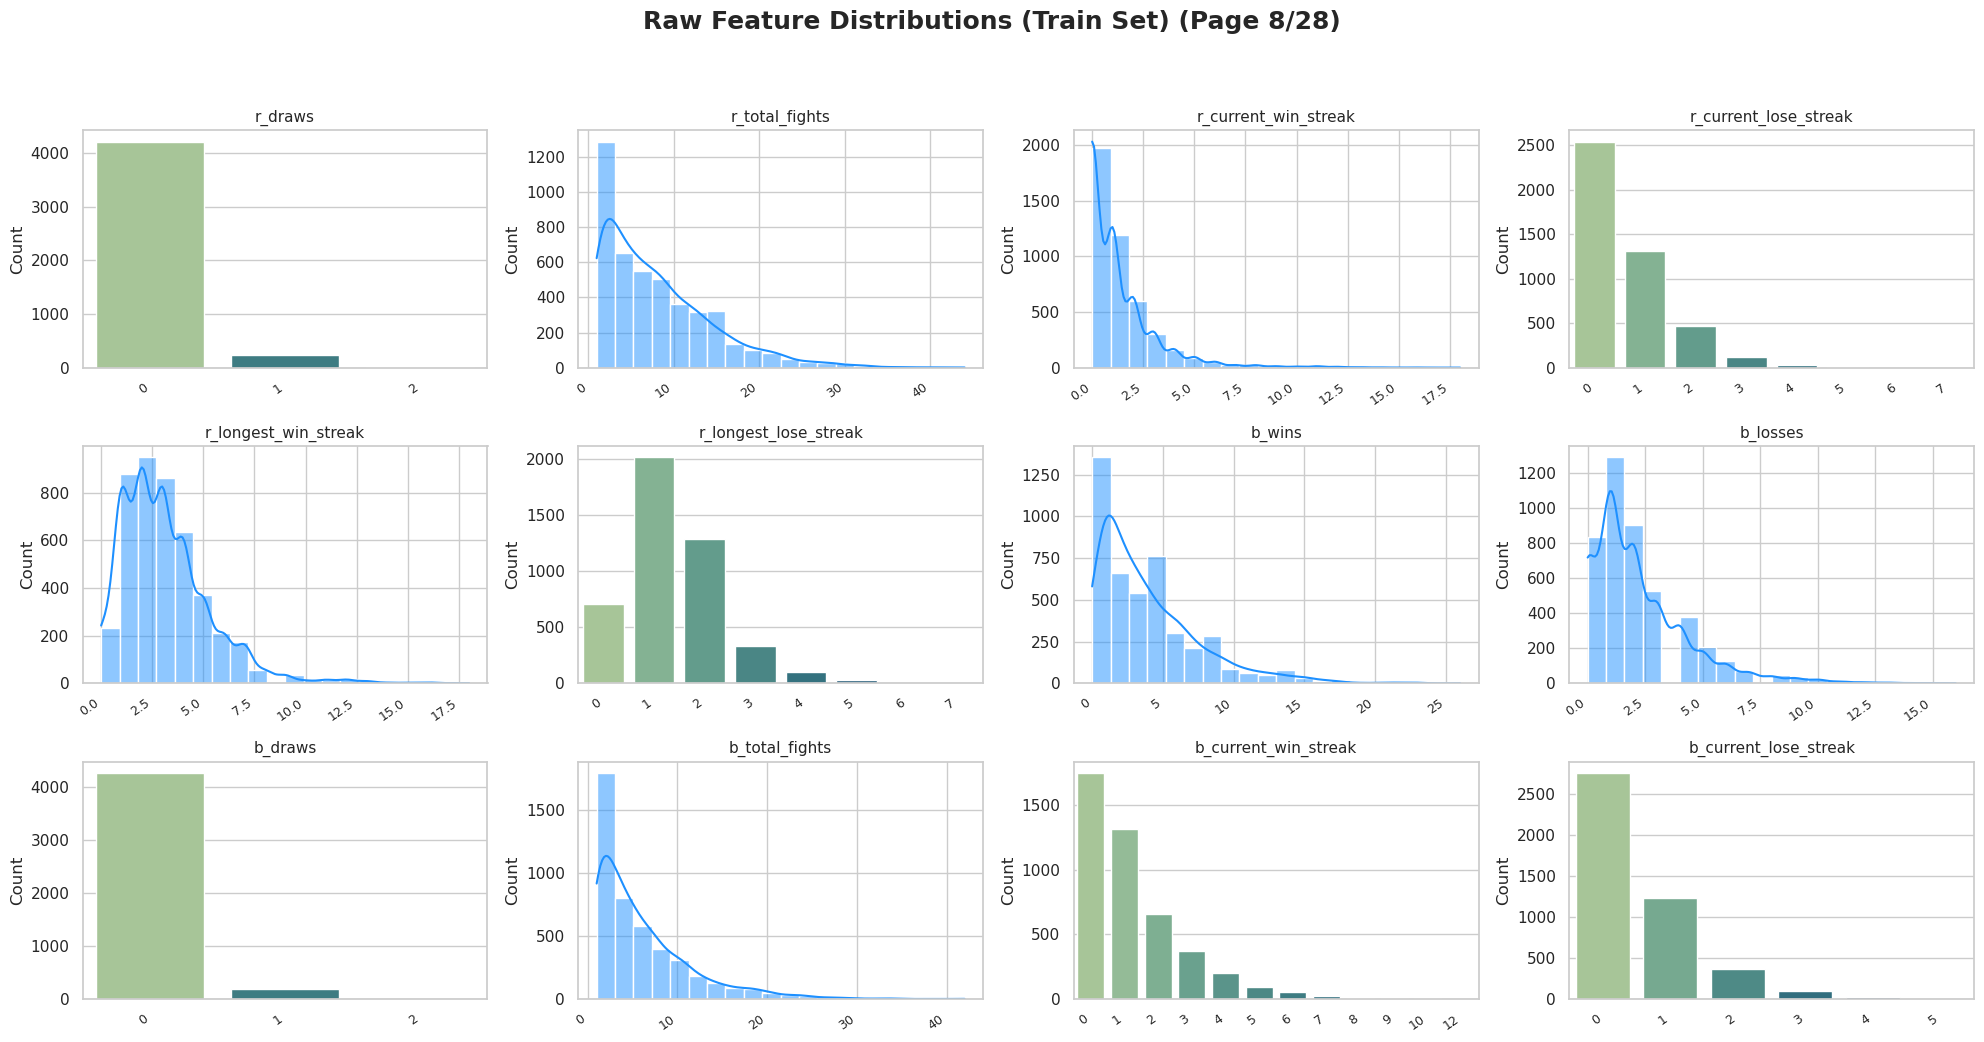

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using ca

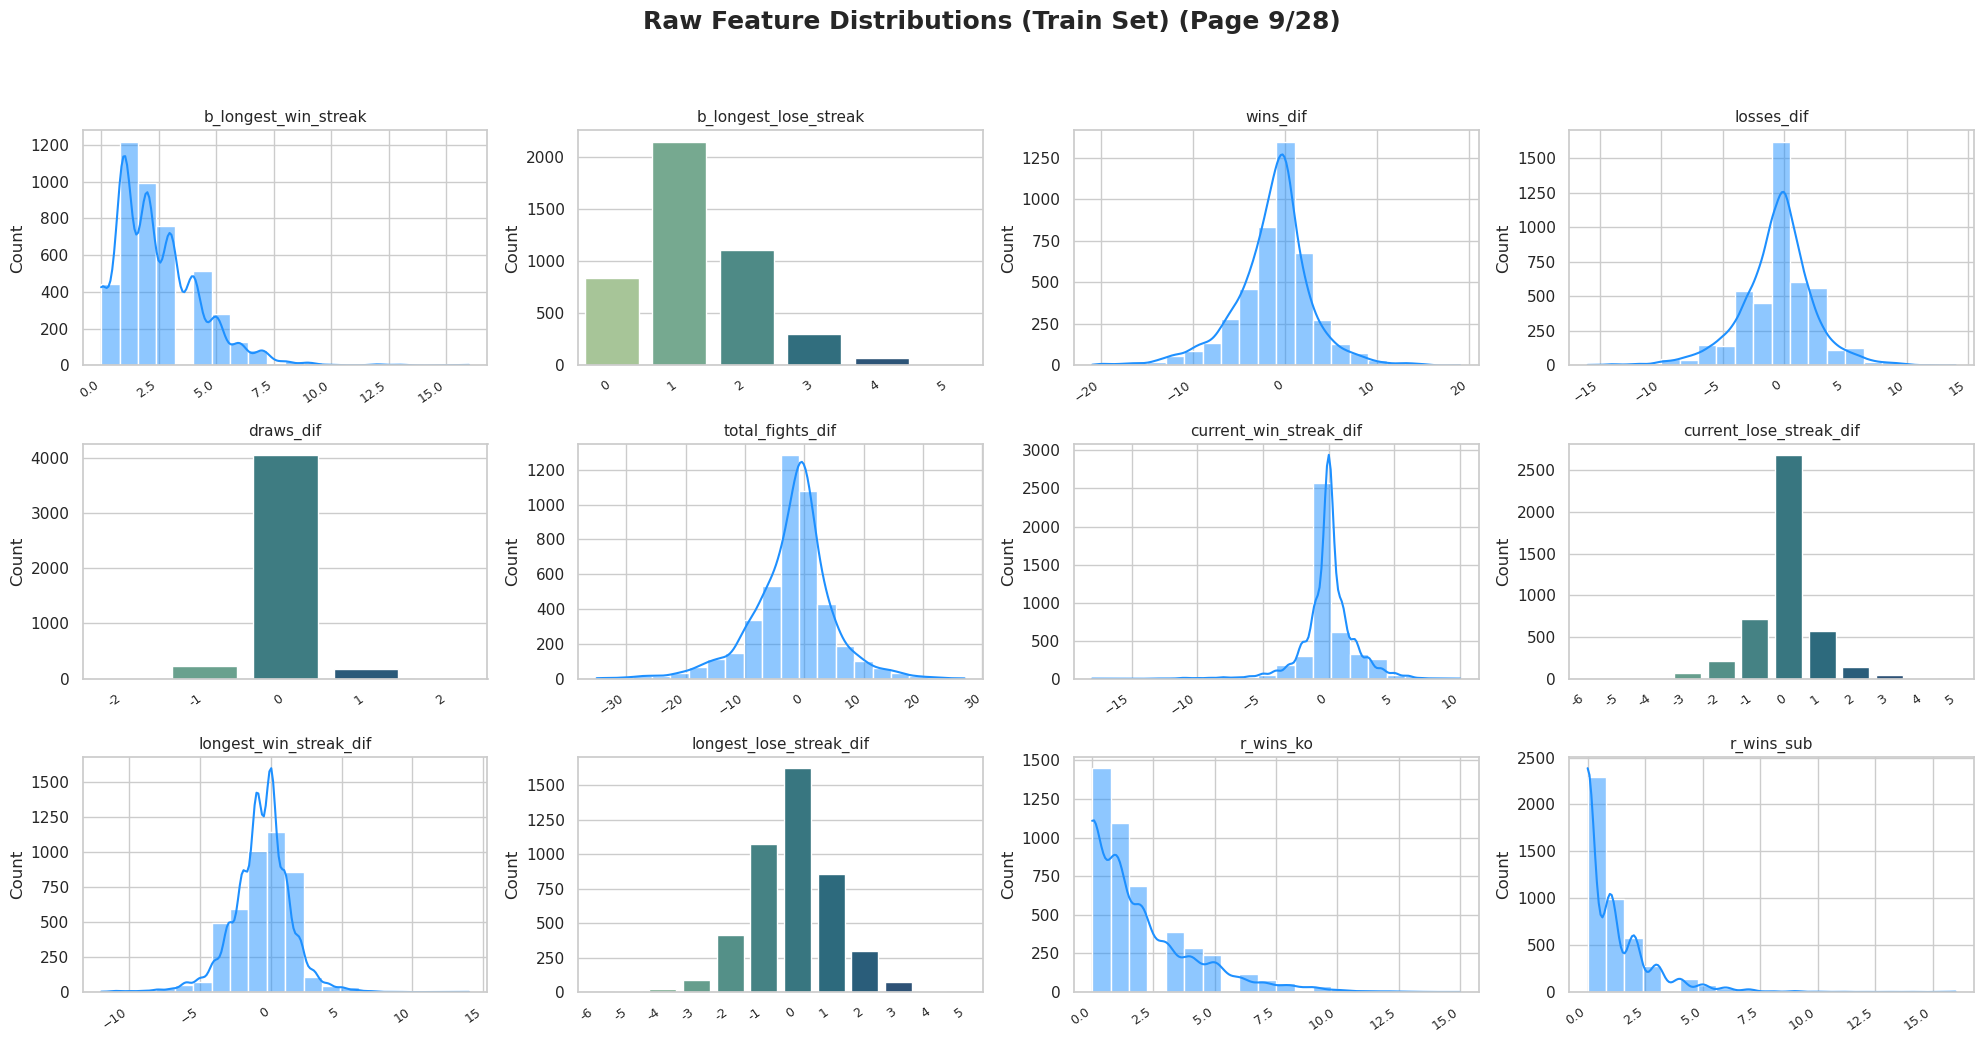

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using ca

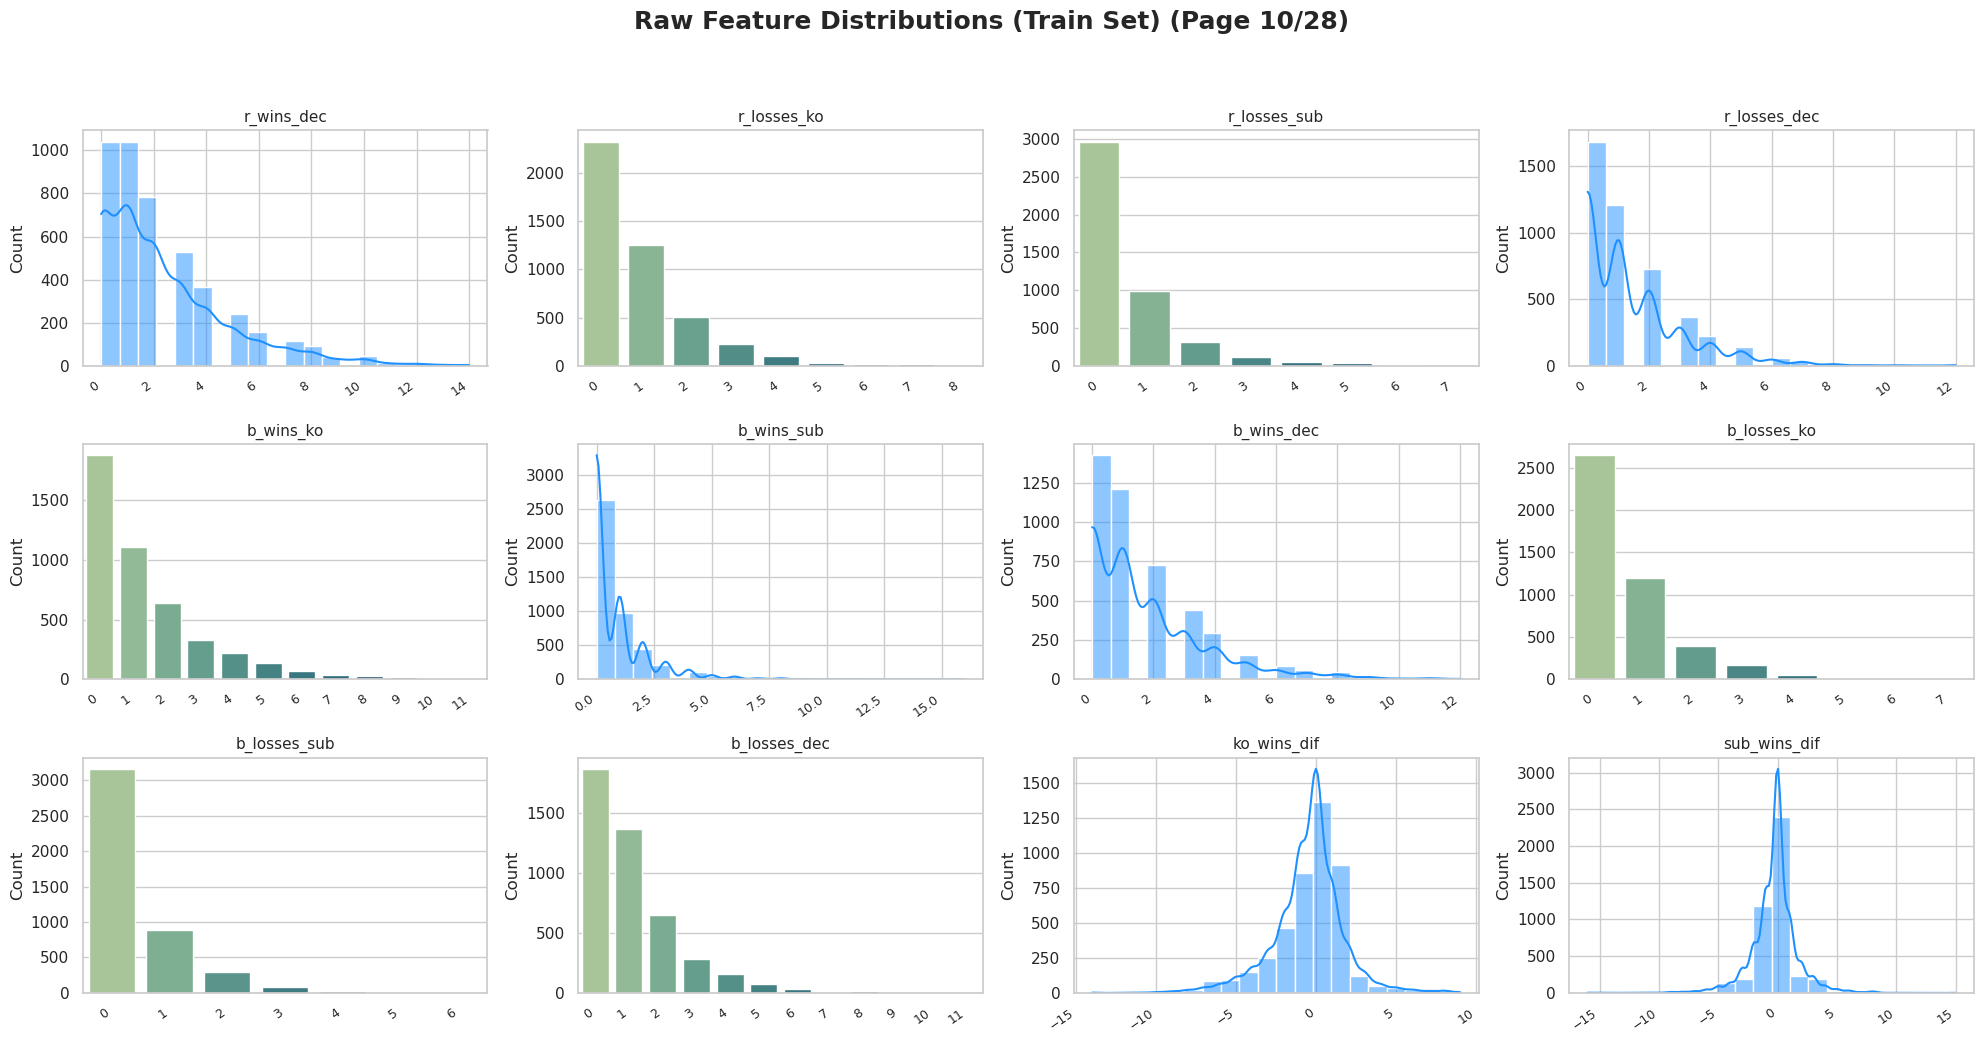

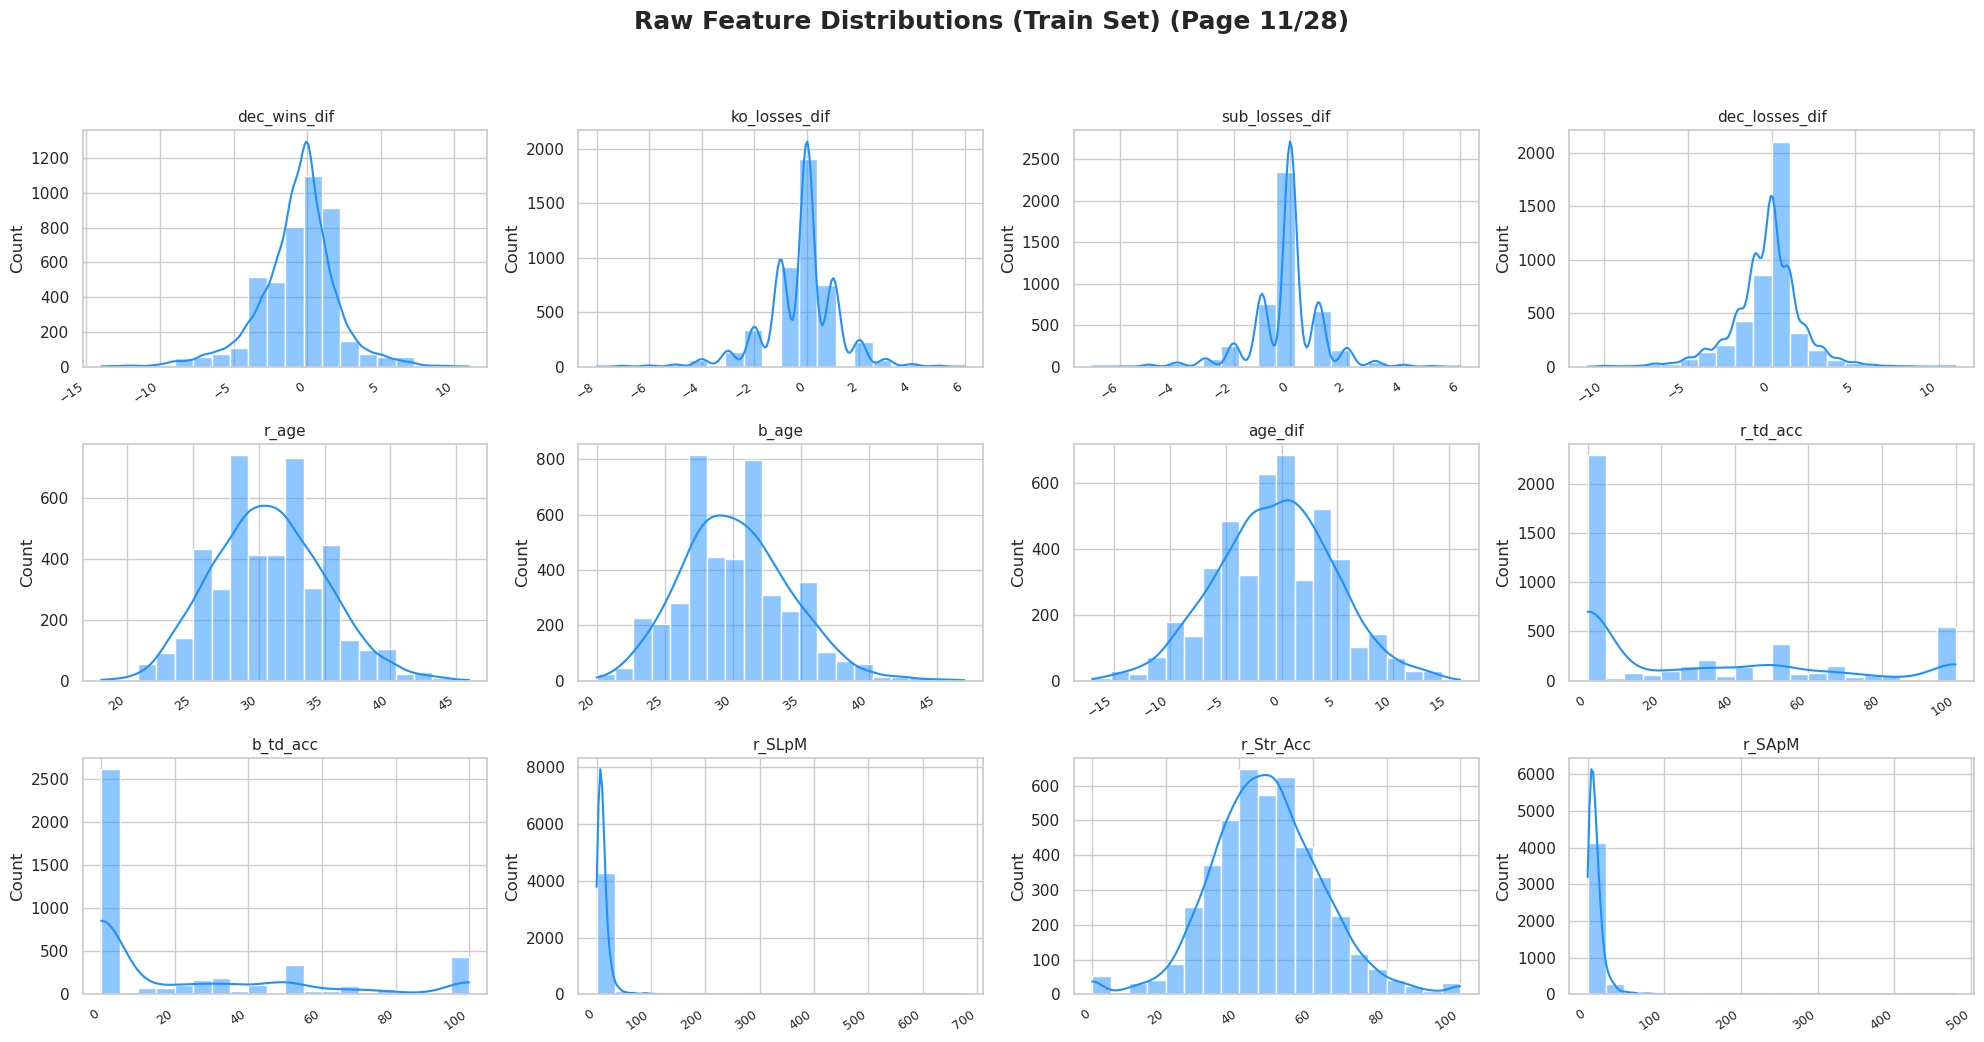

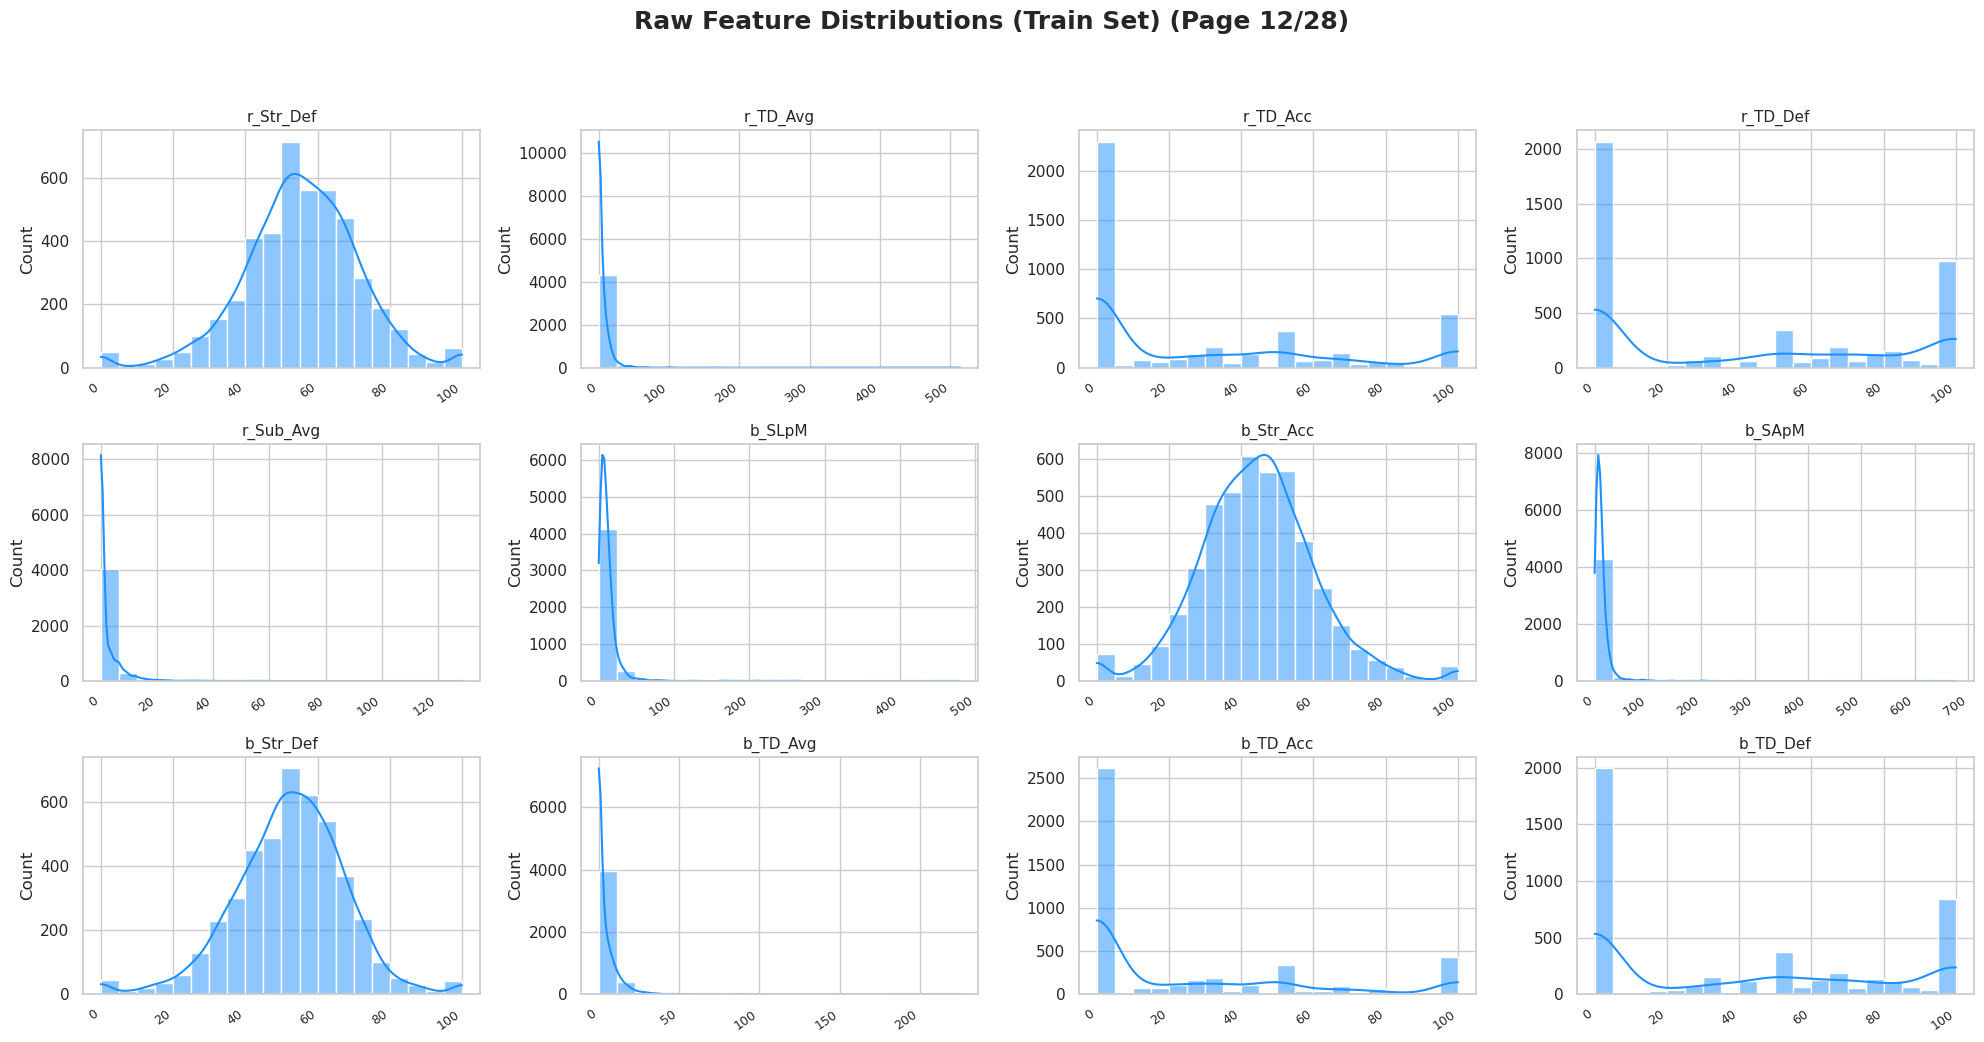

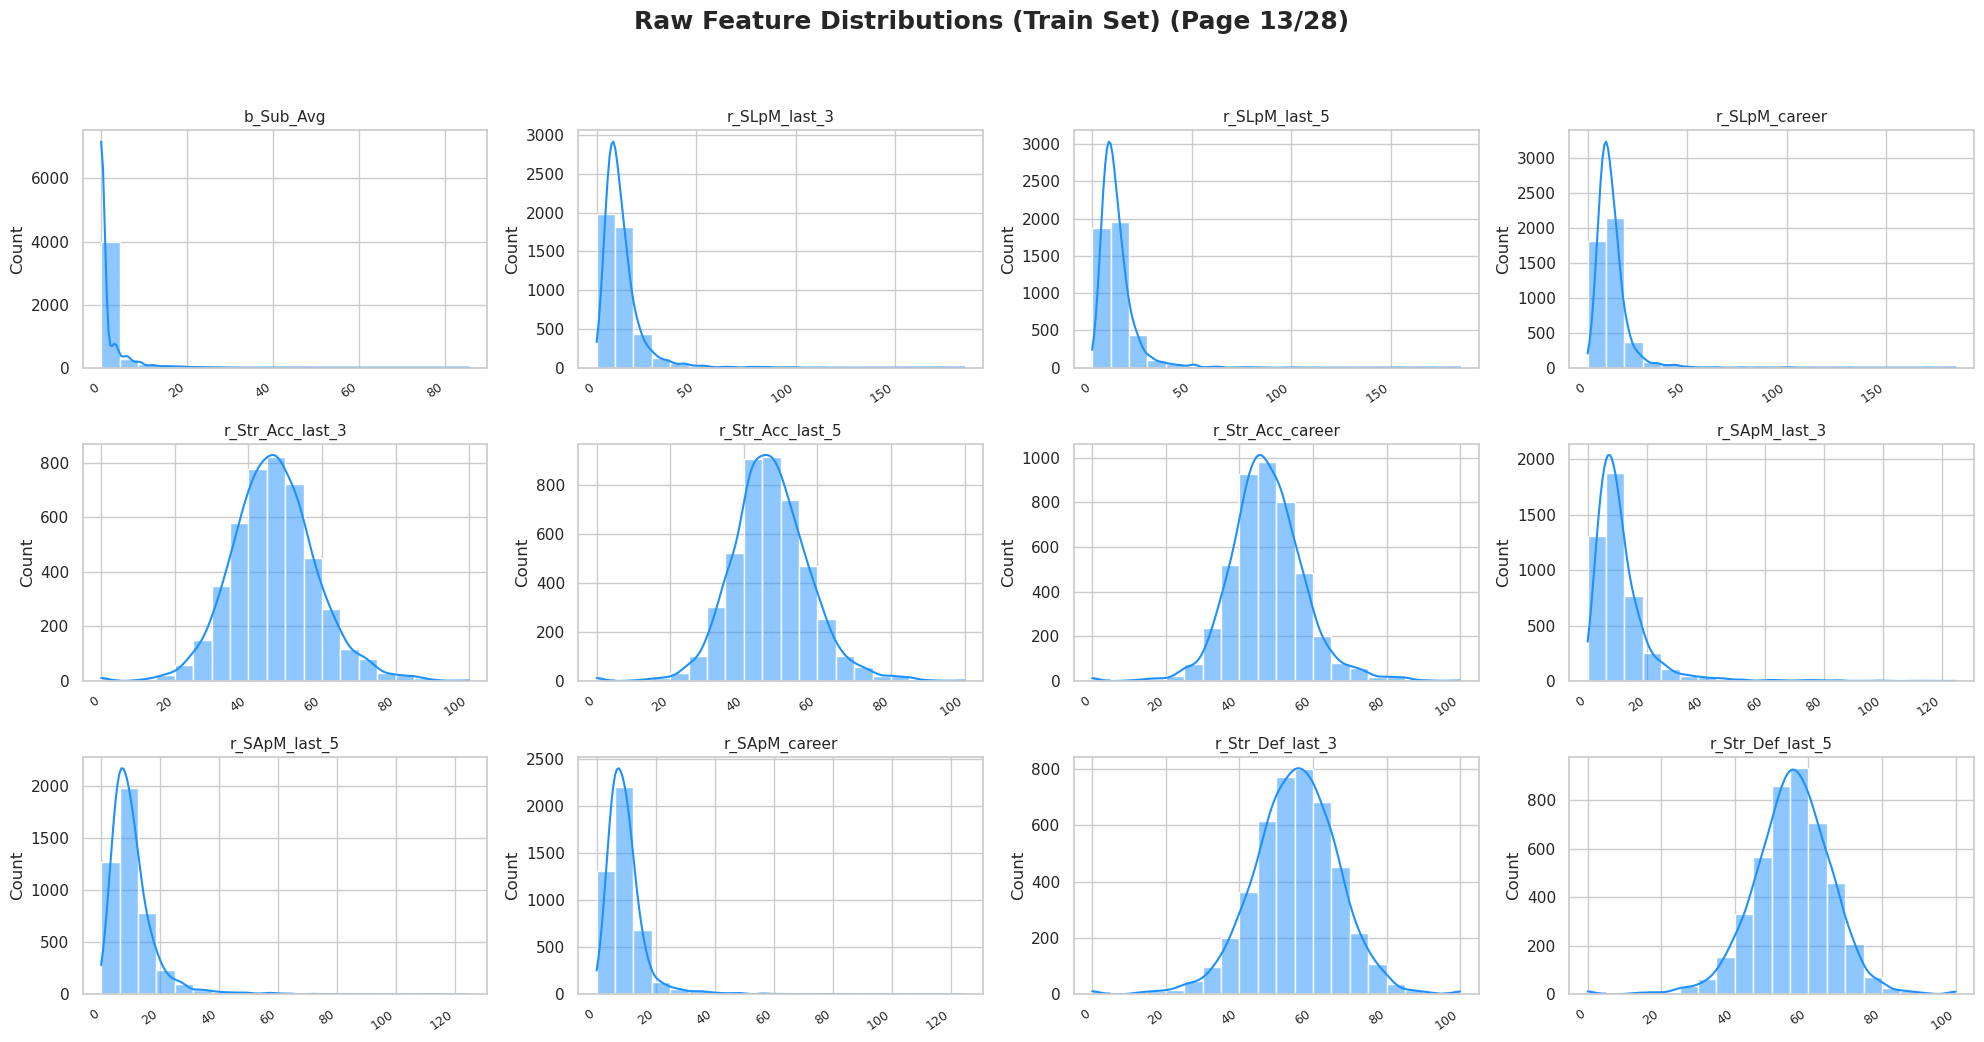

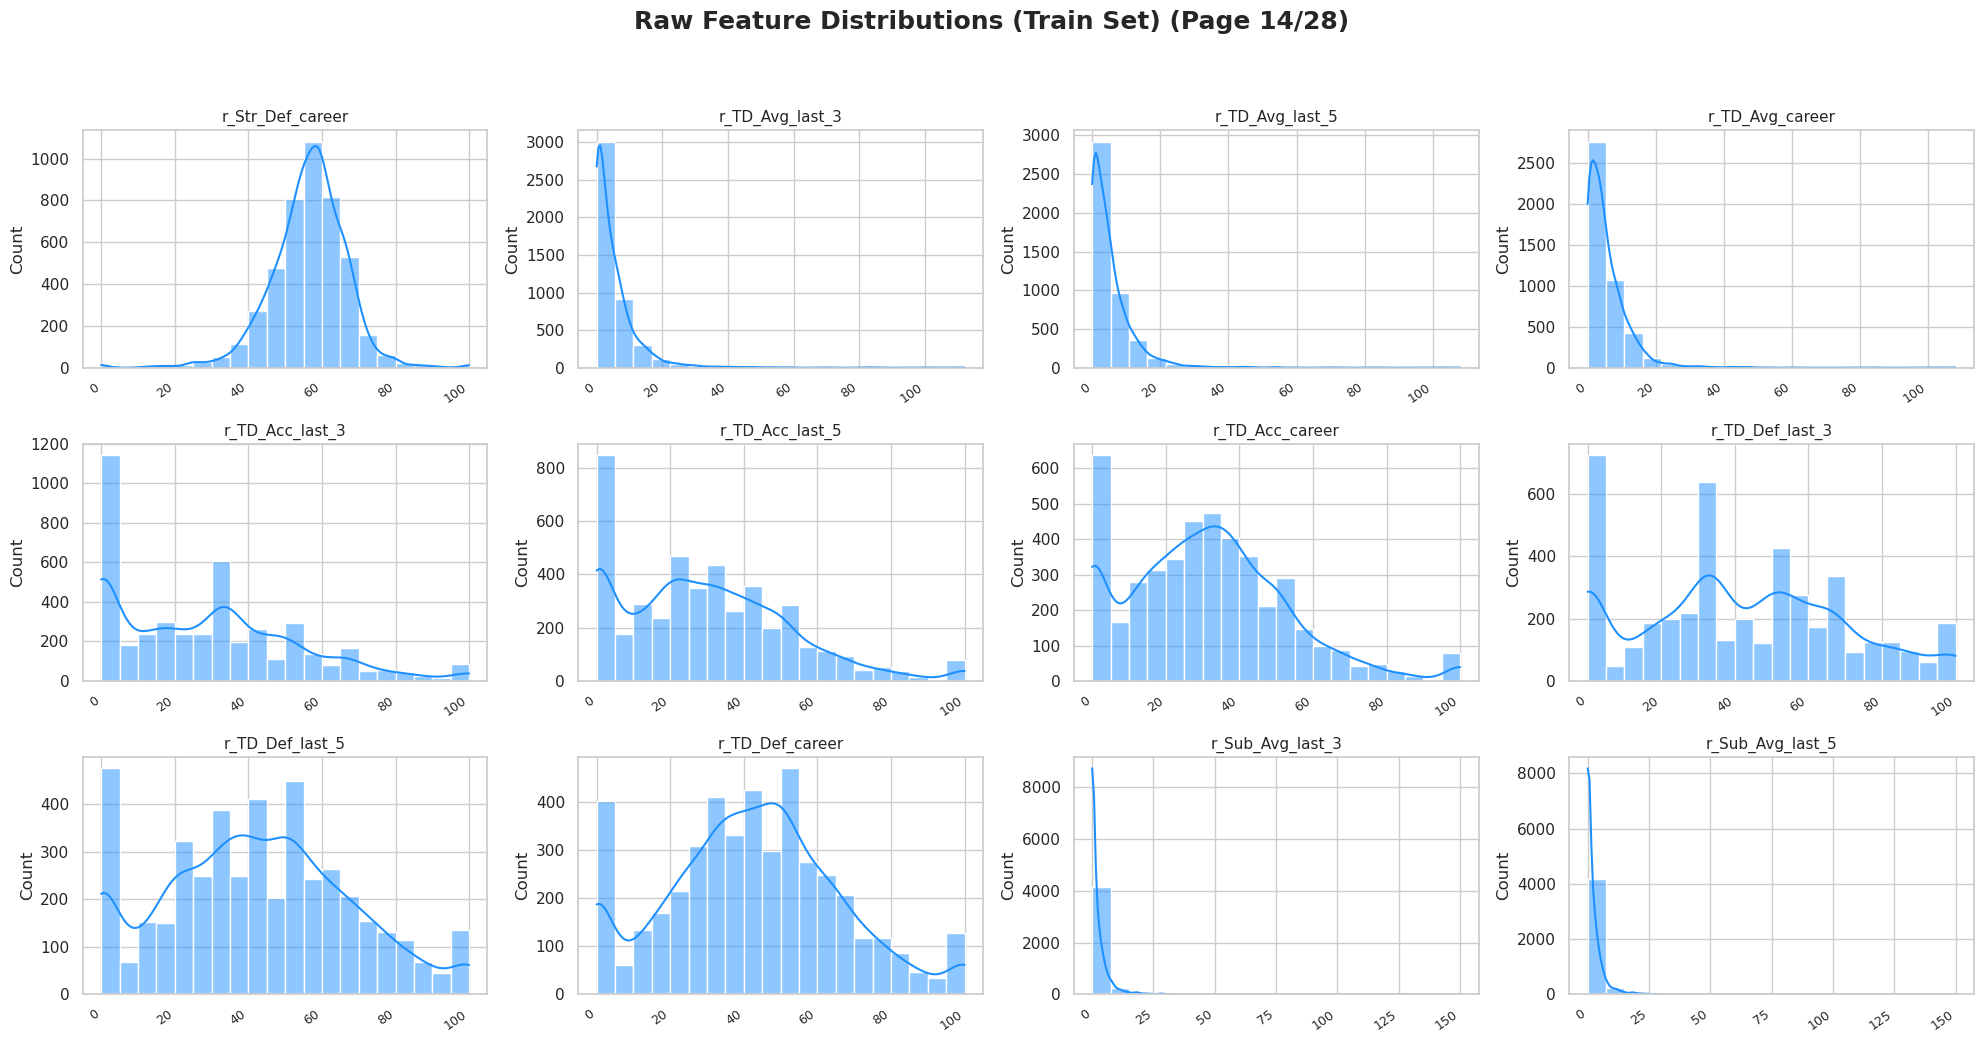

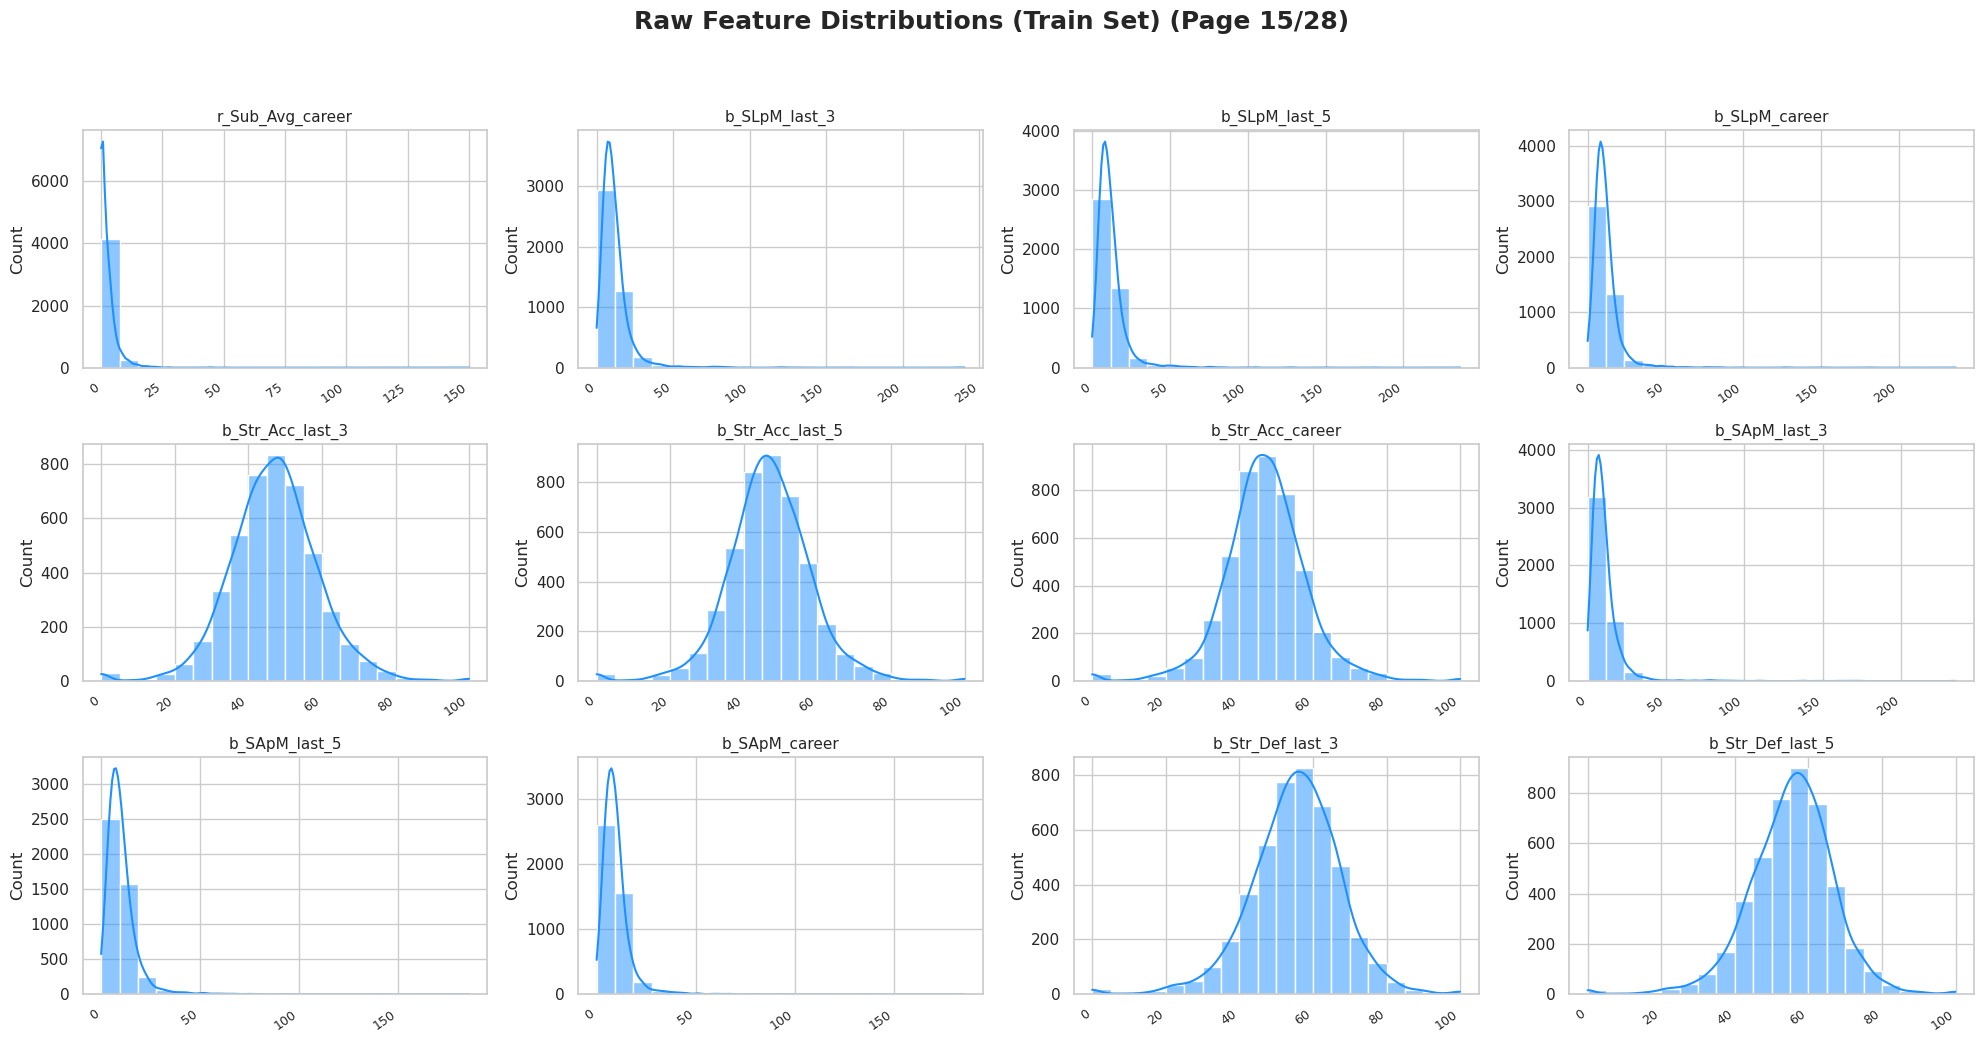

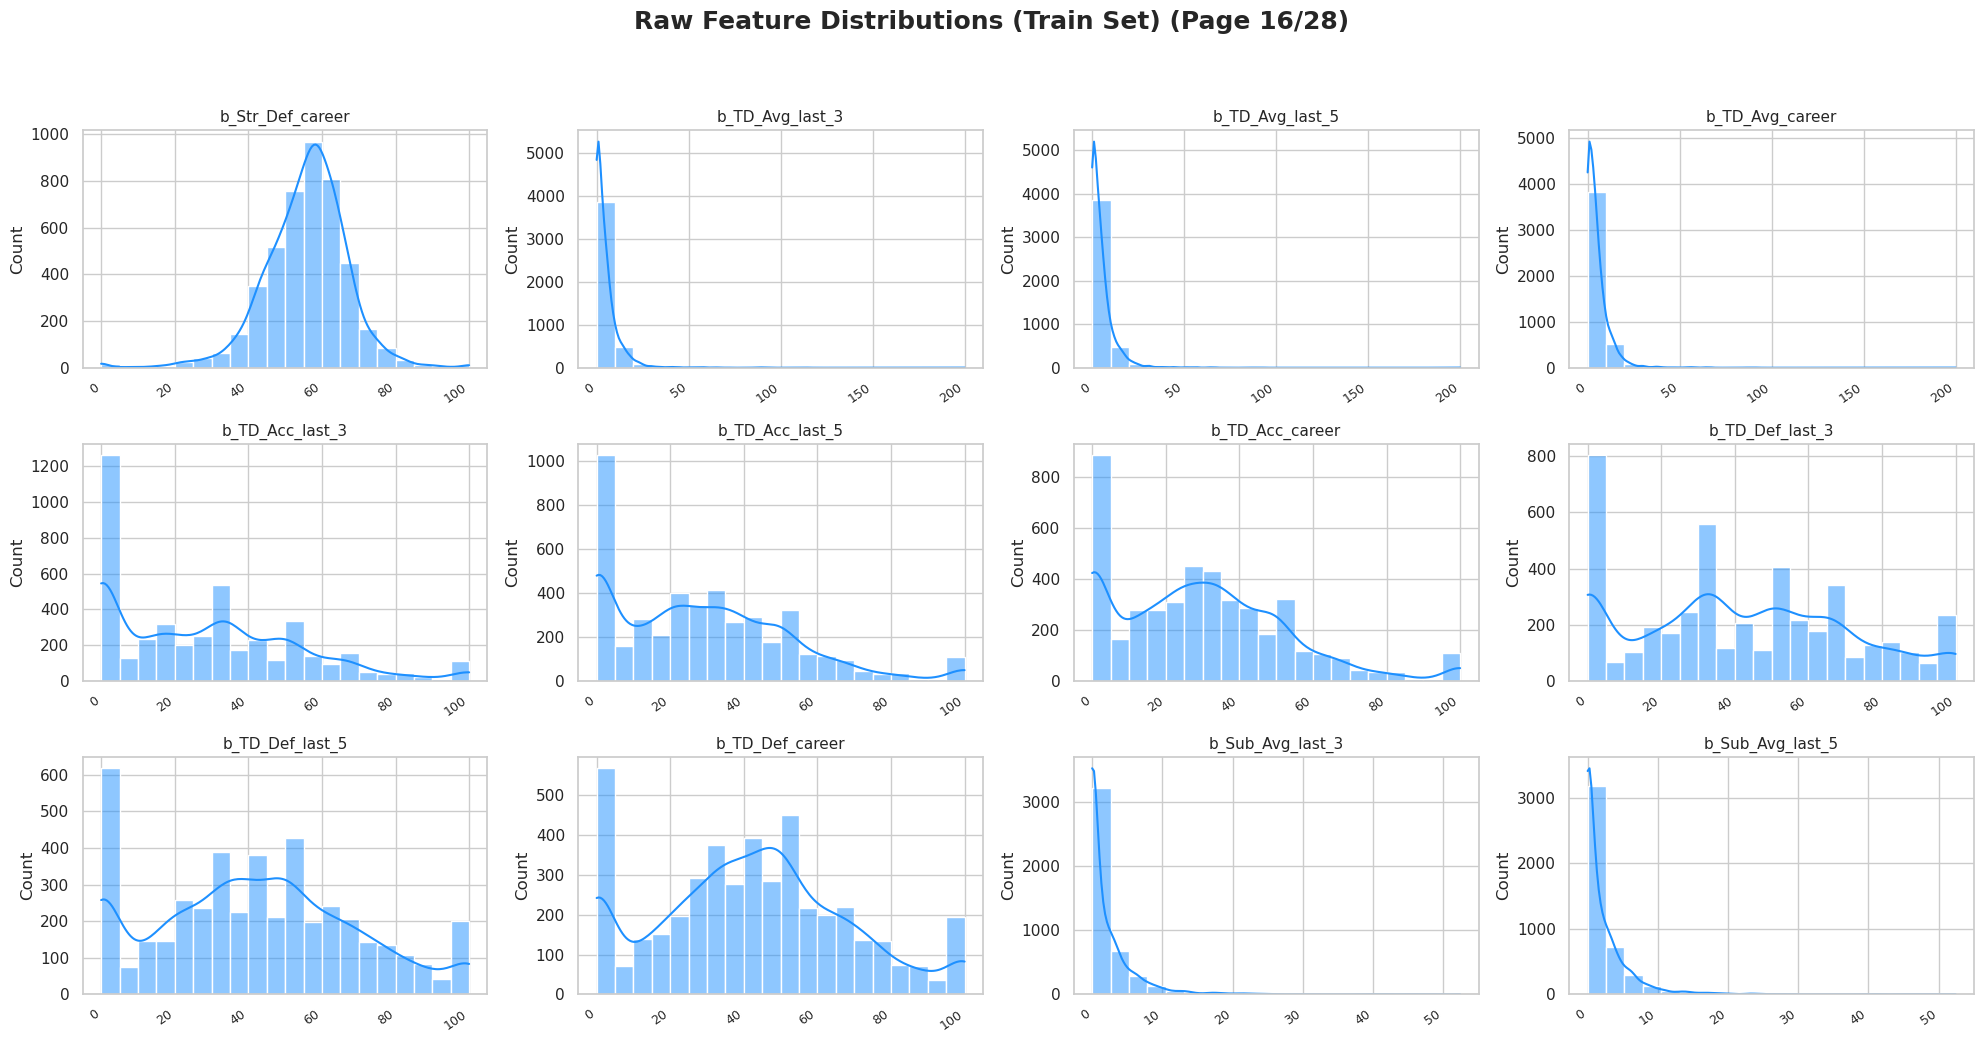

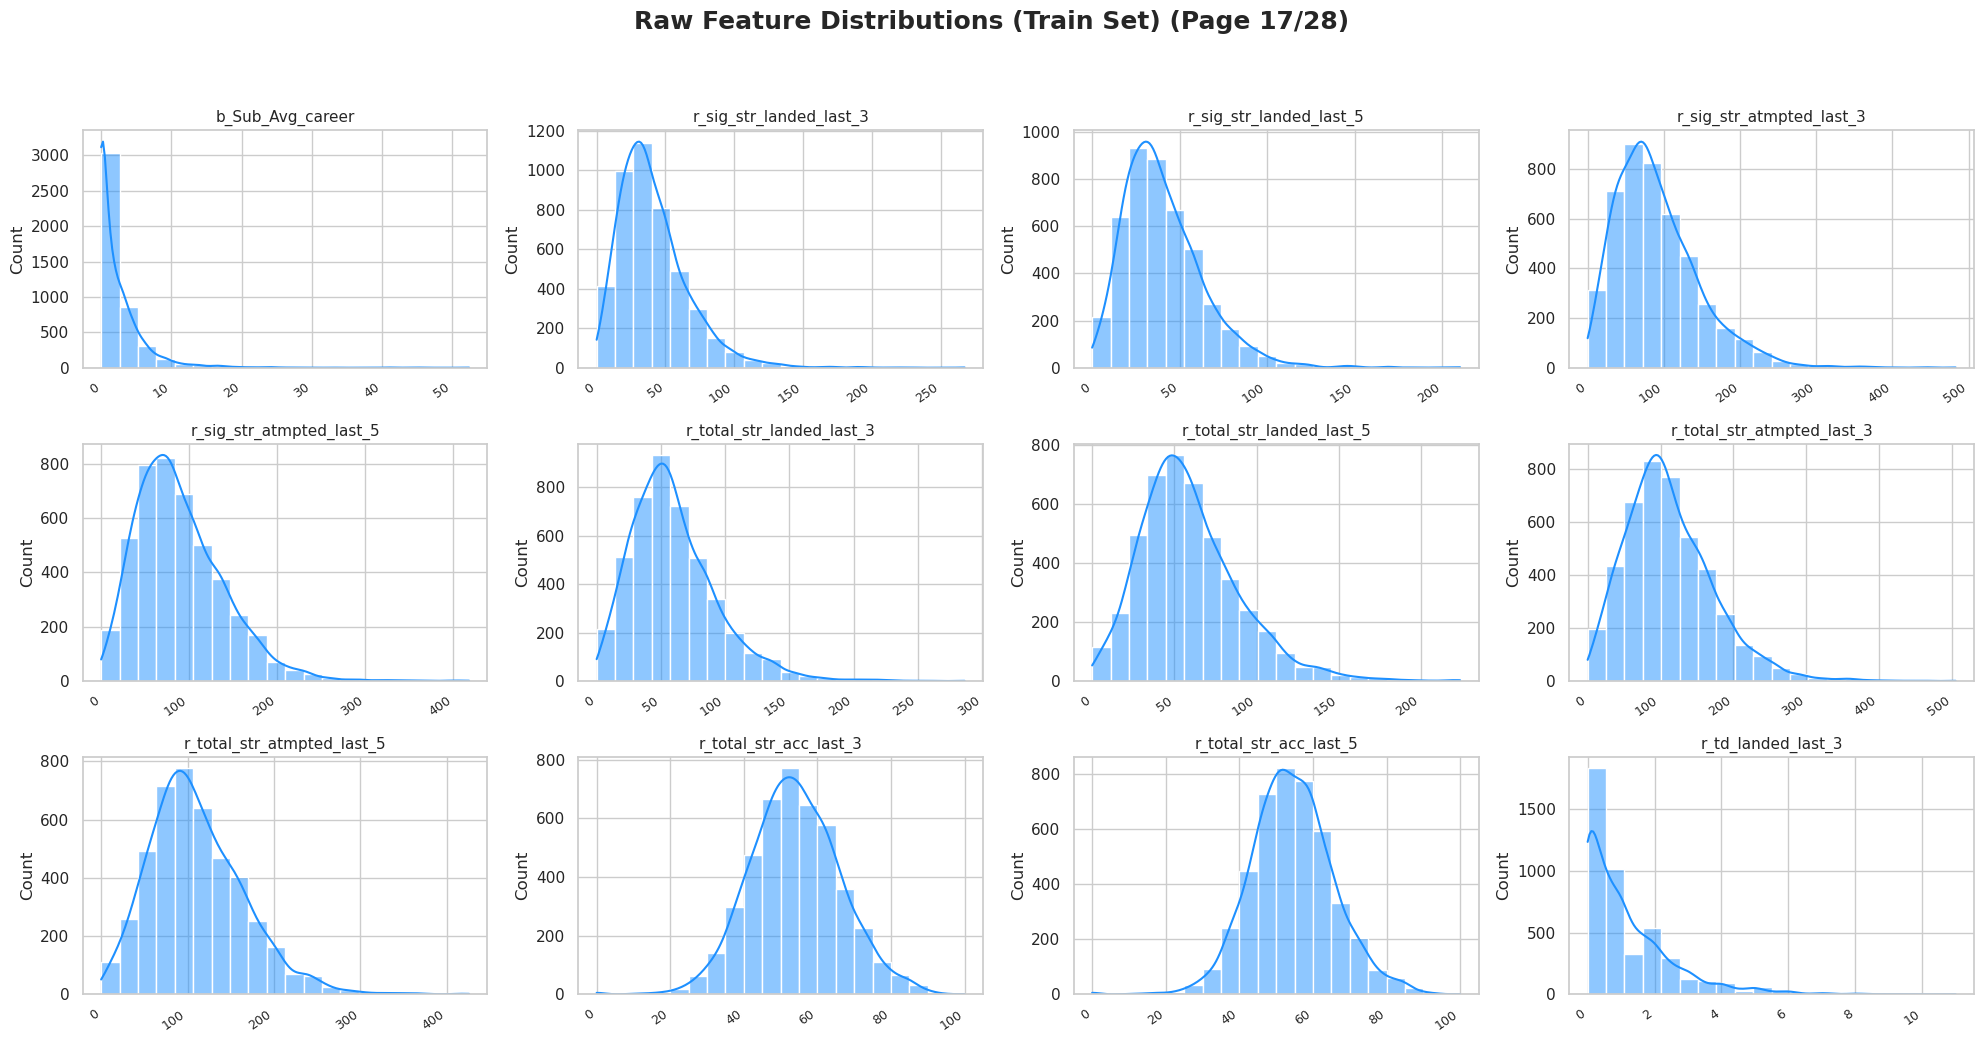

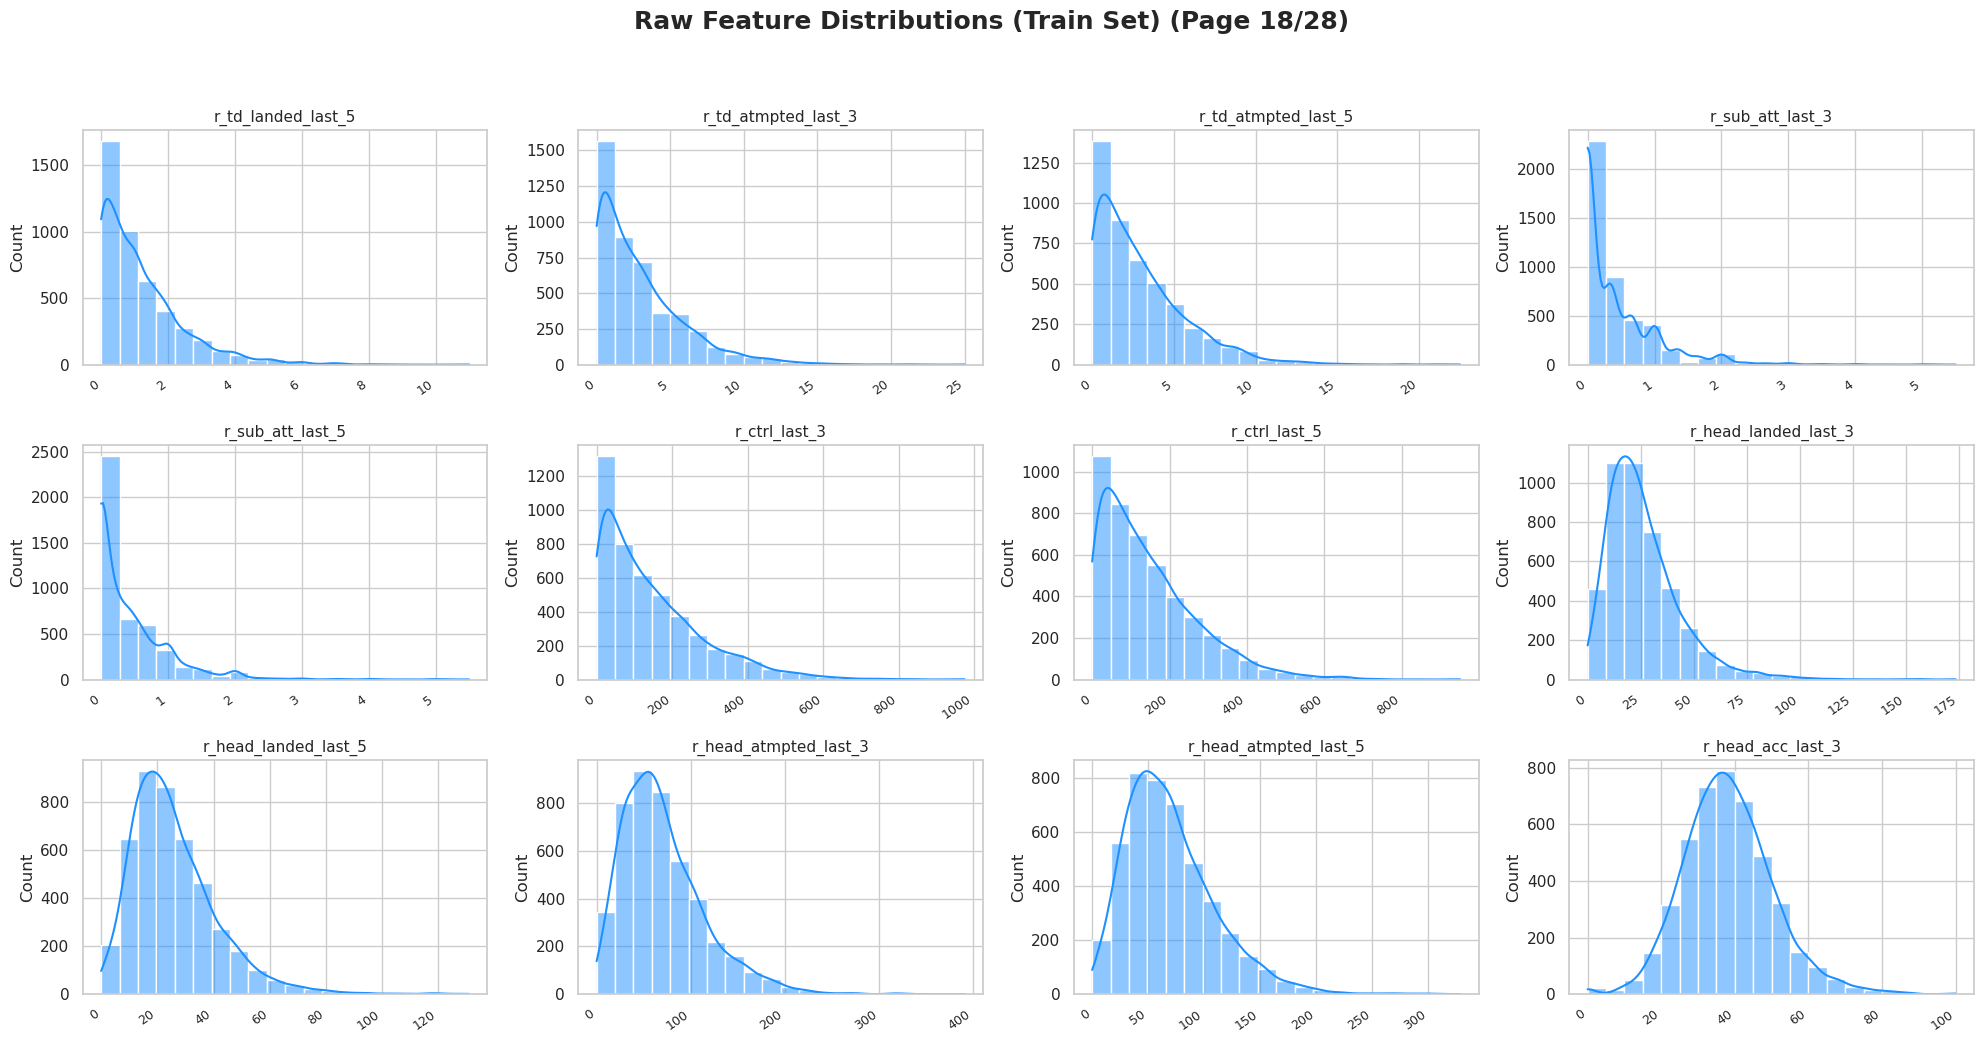

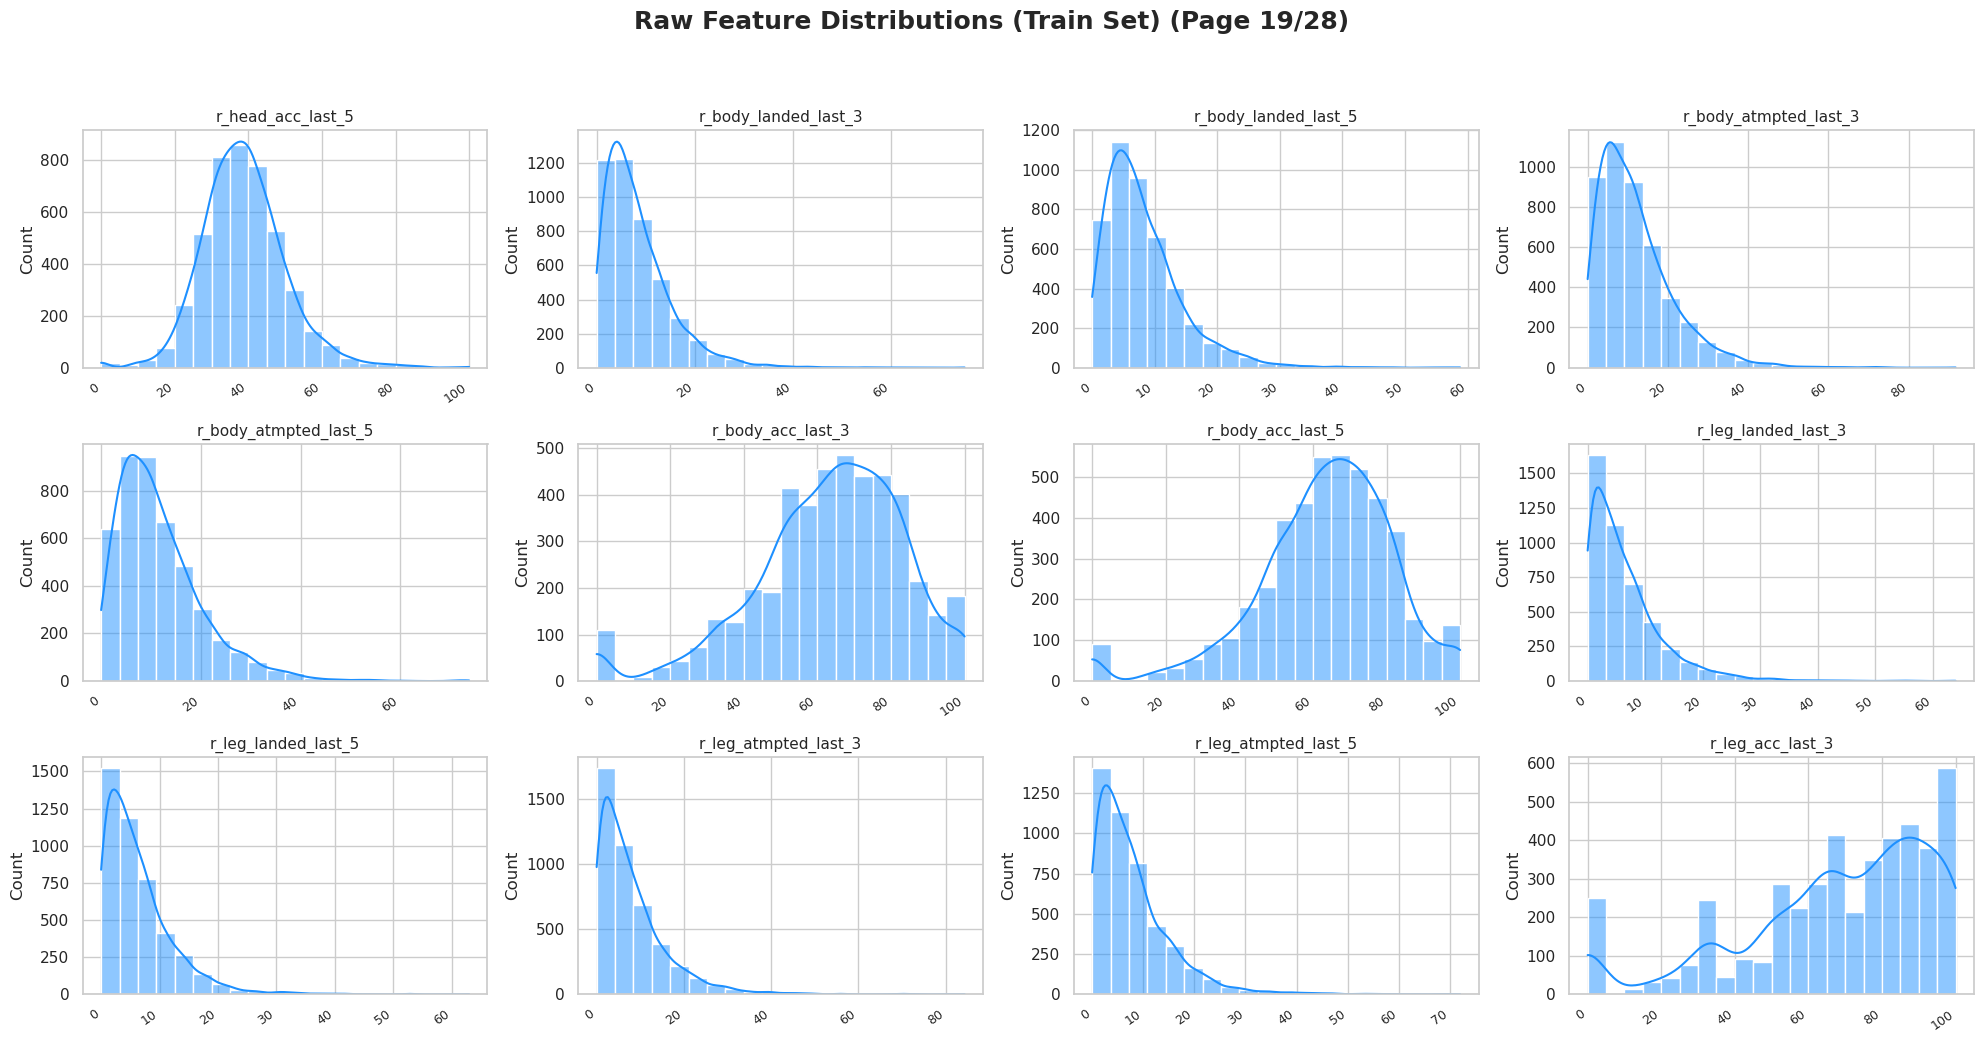

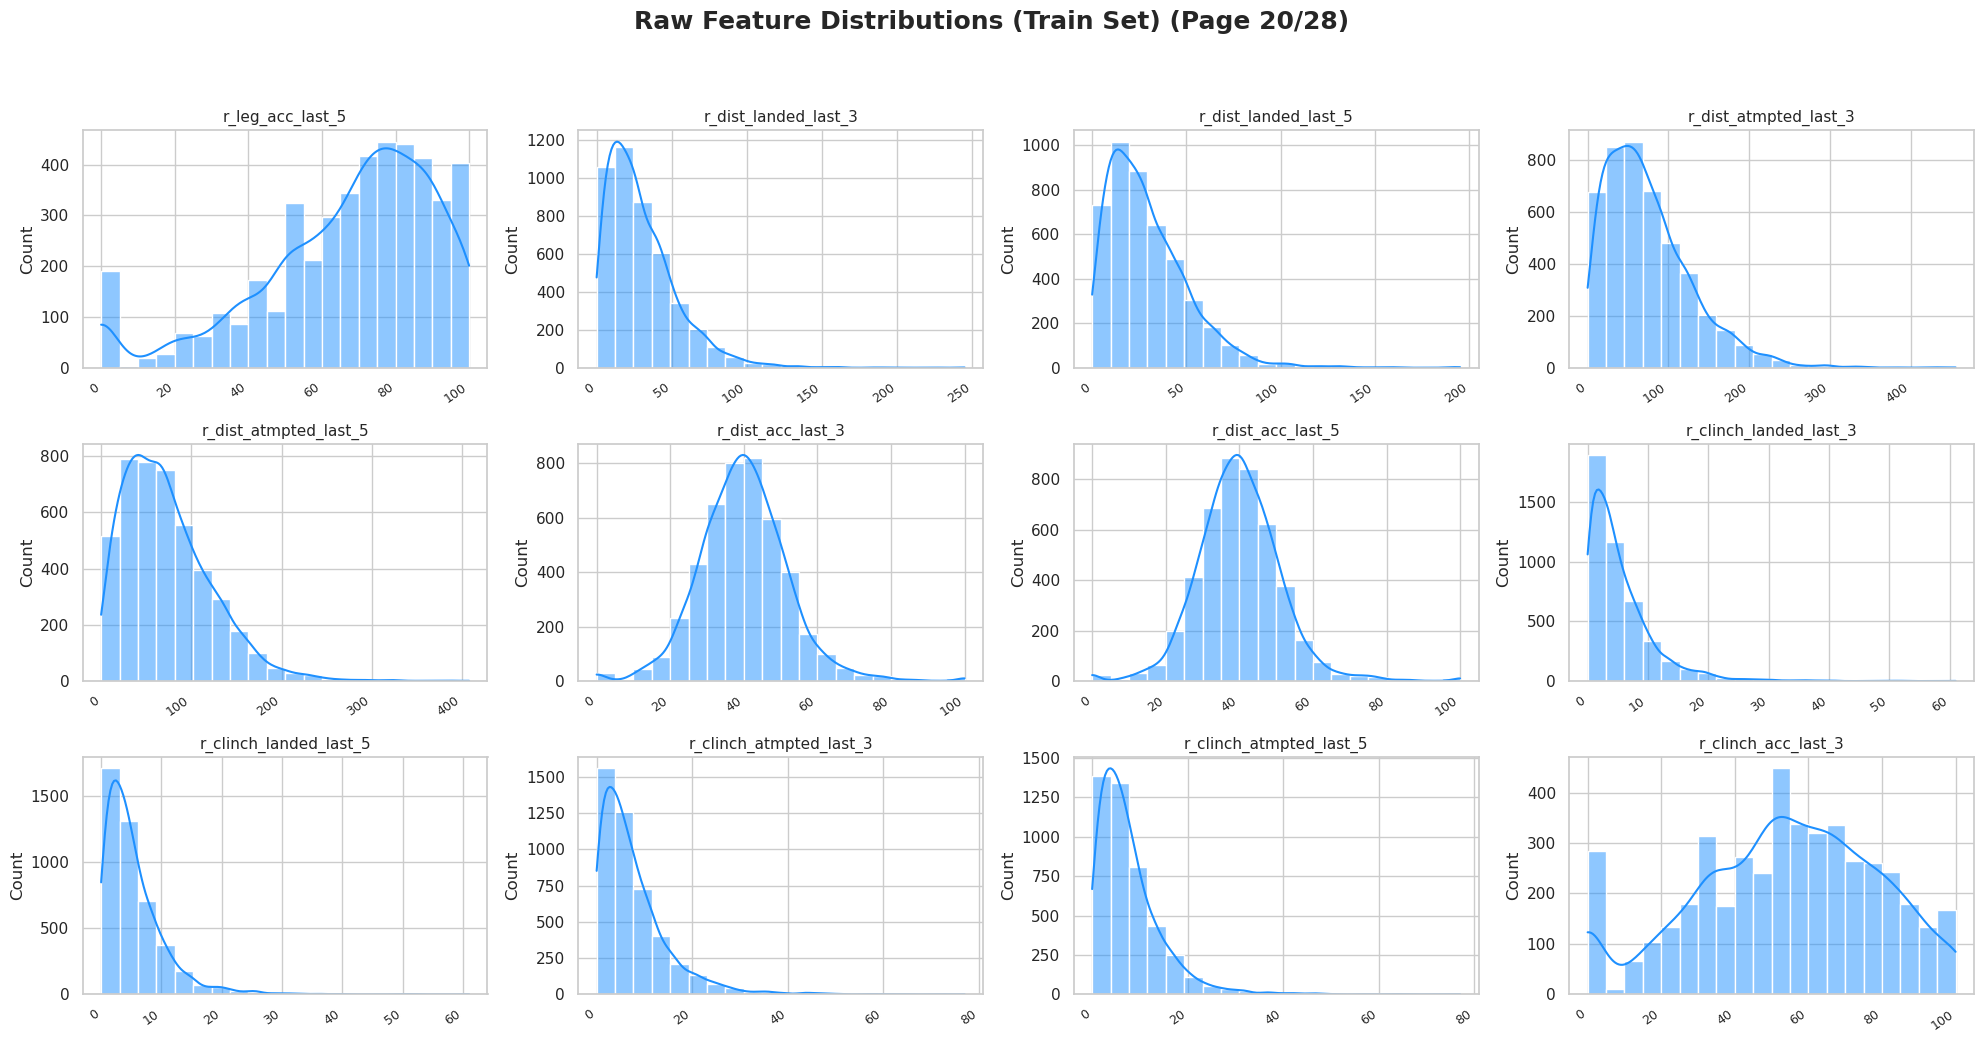

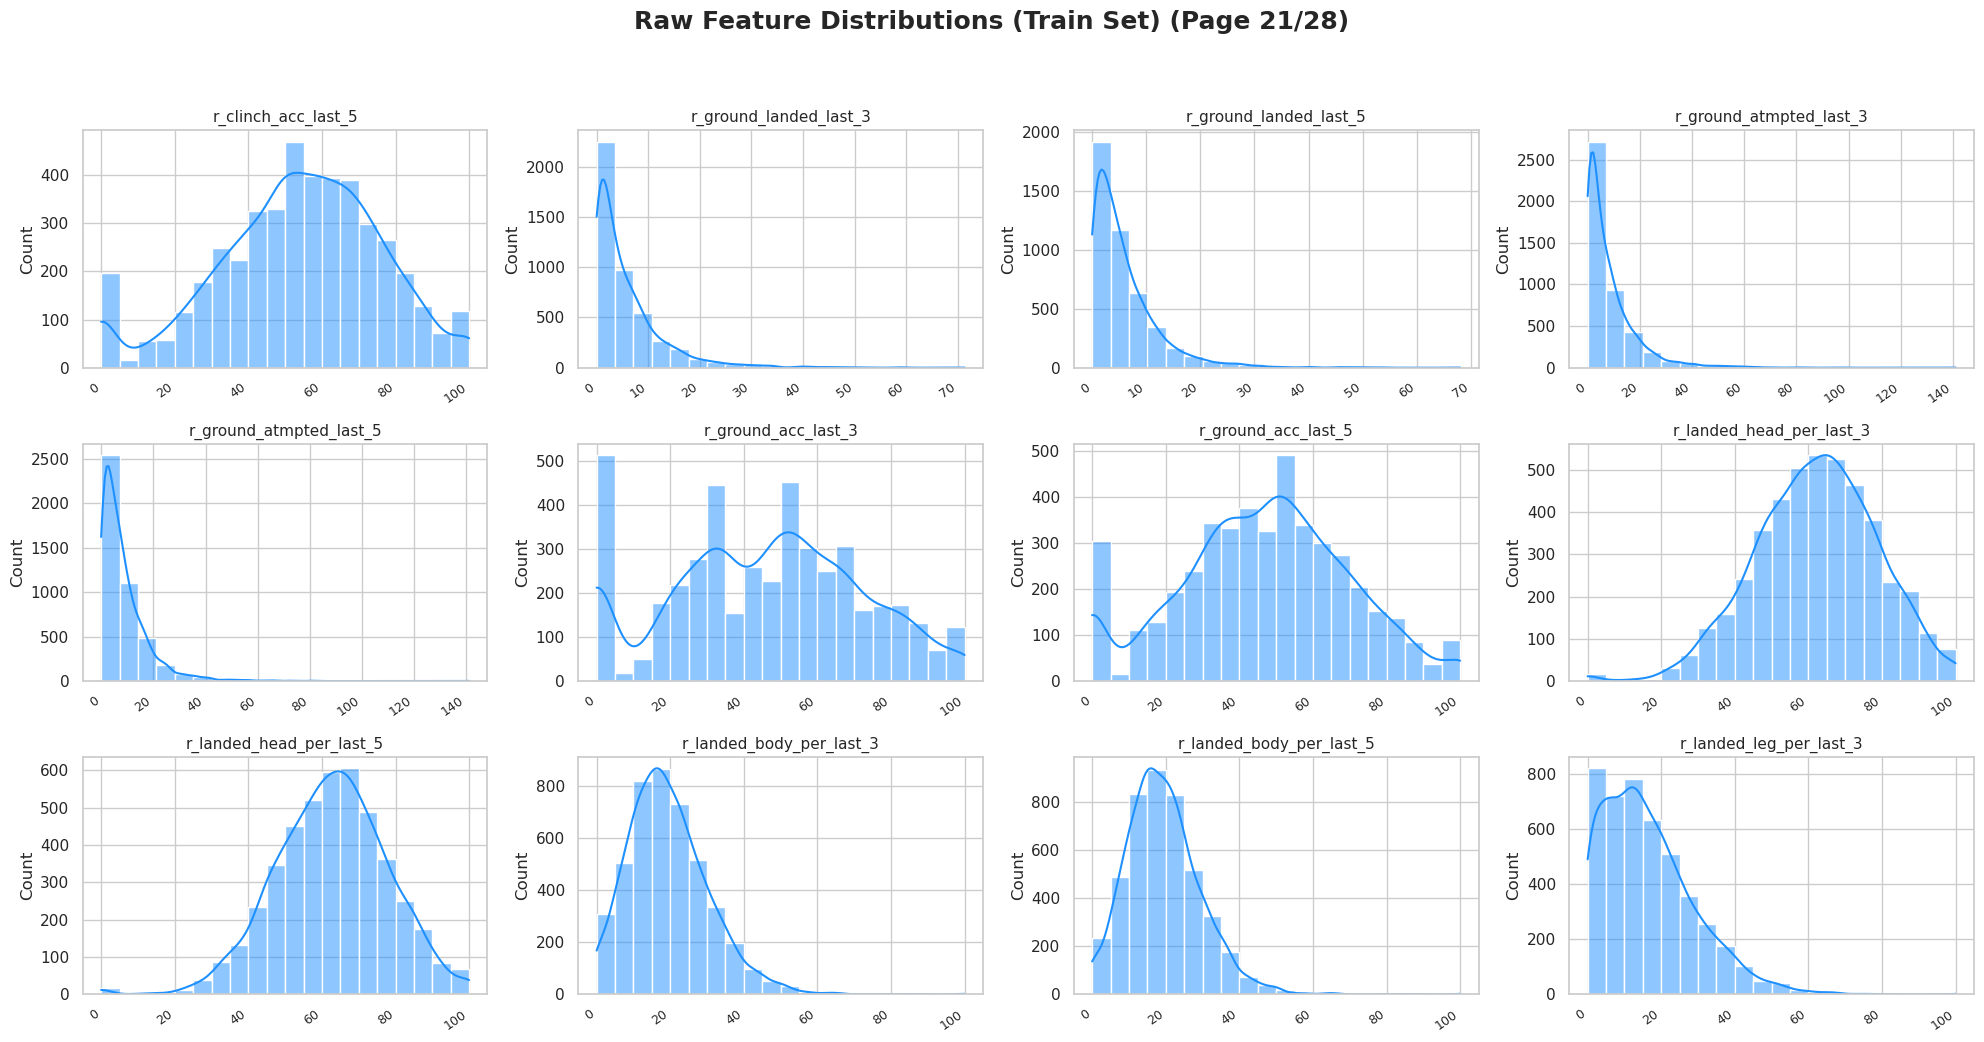

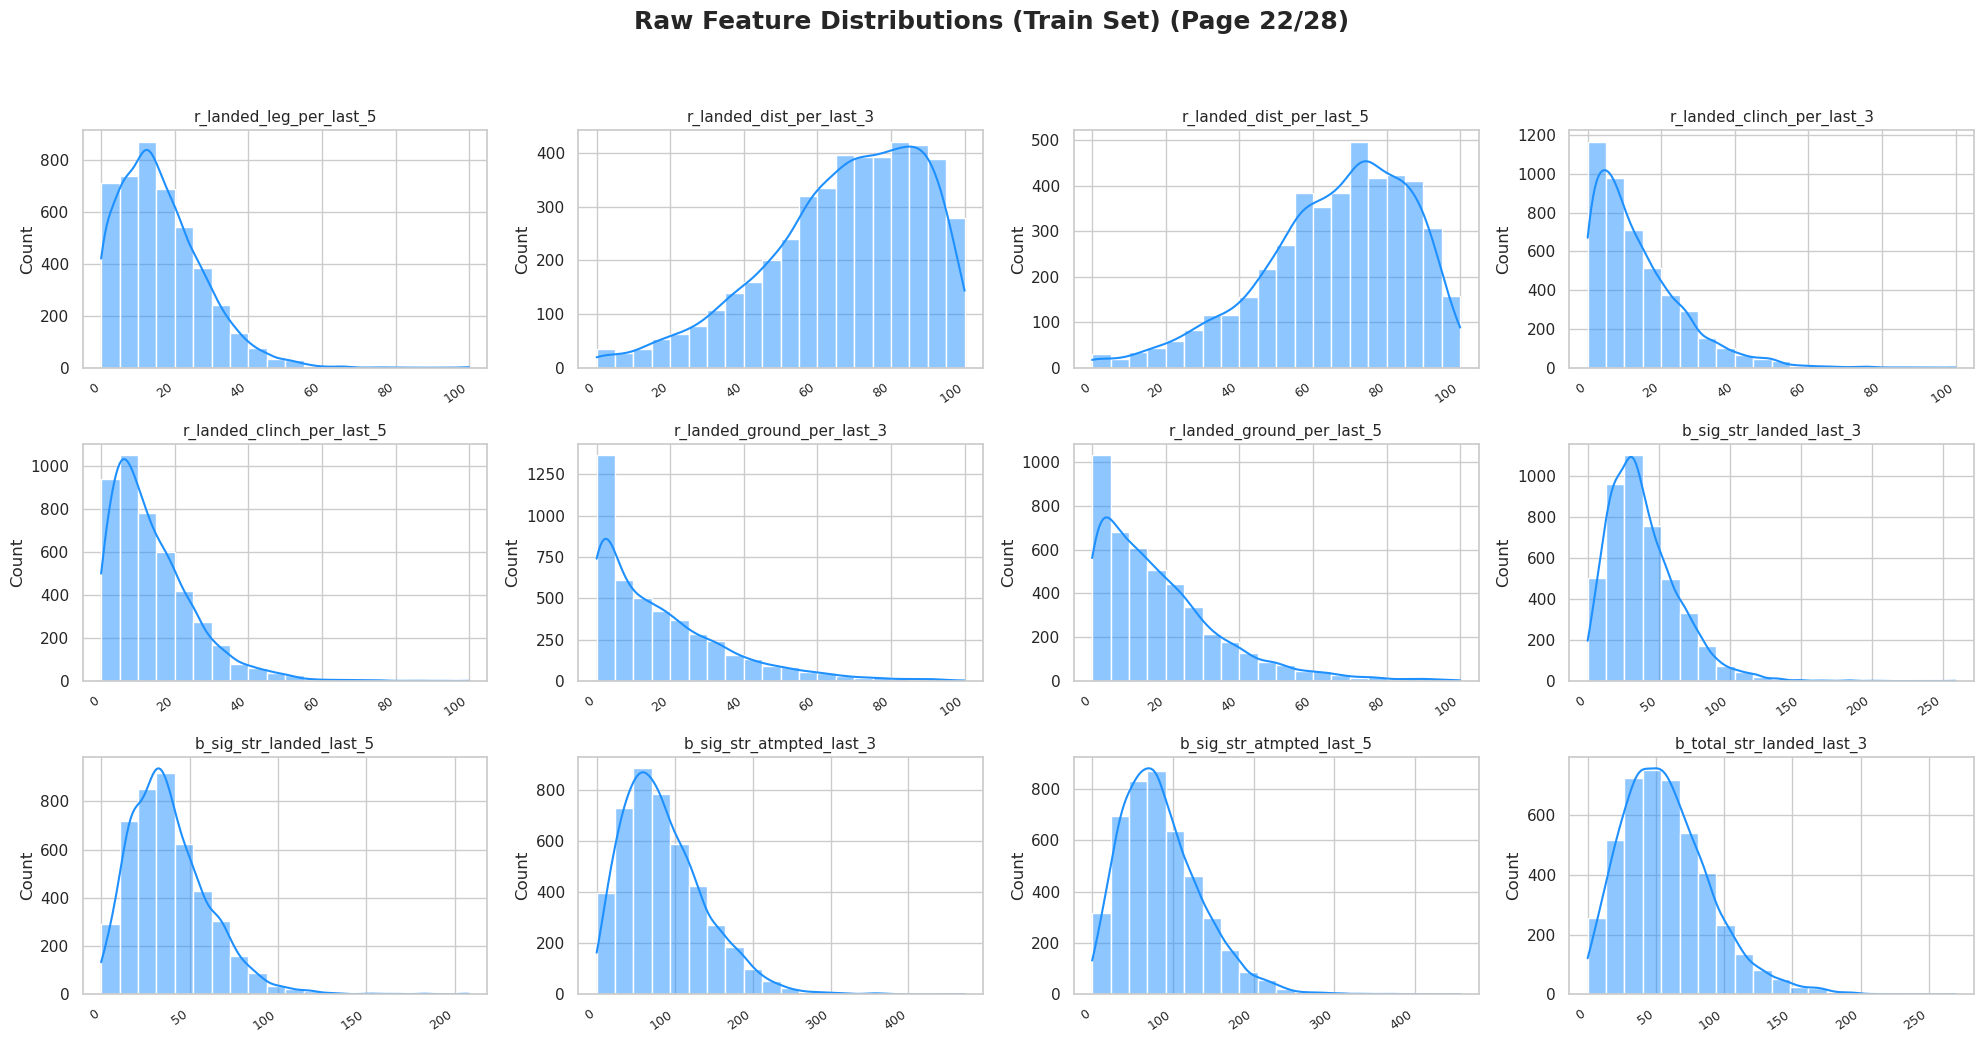

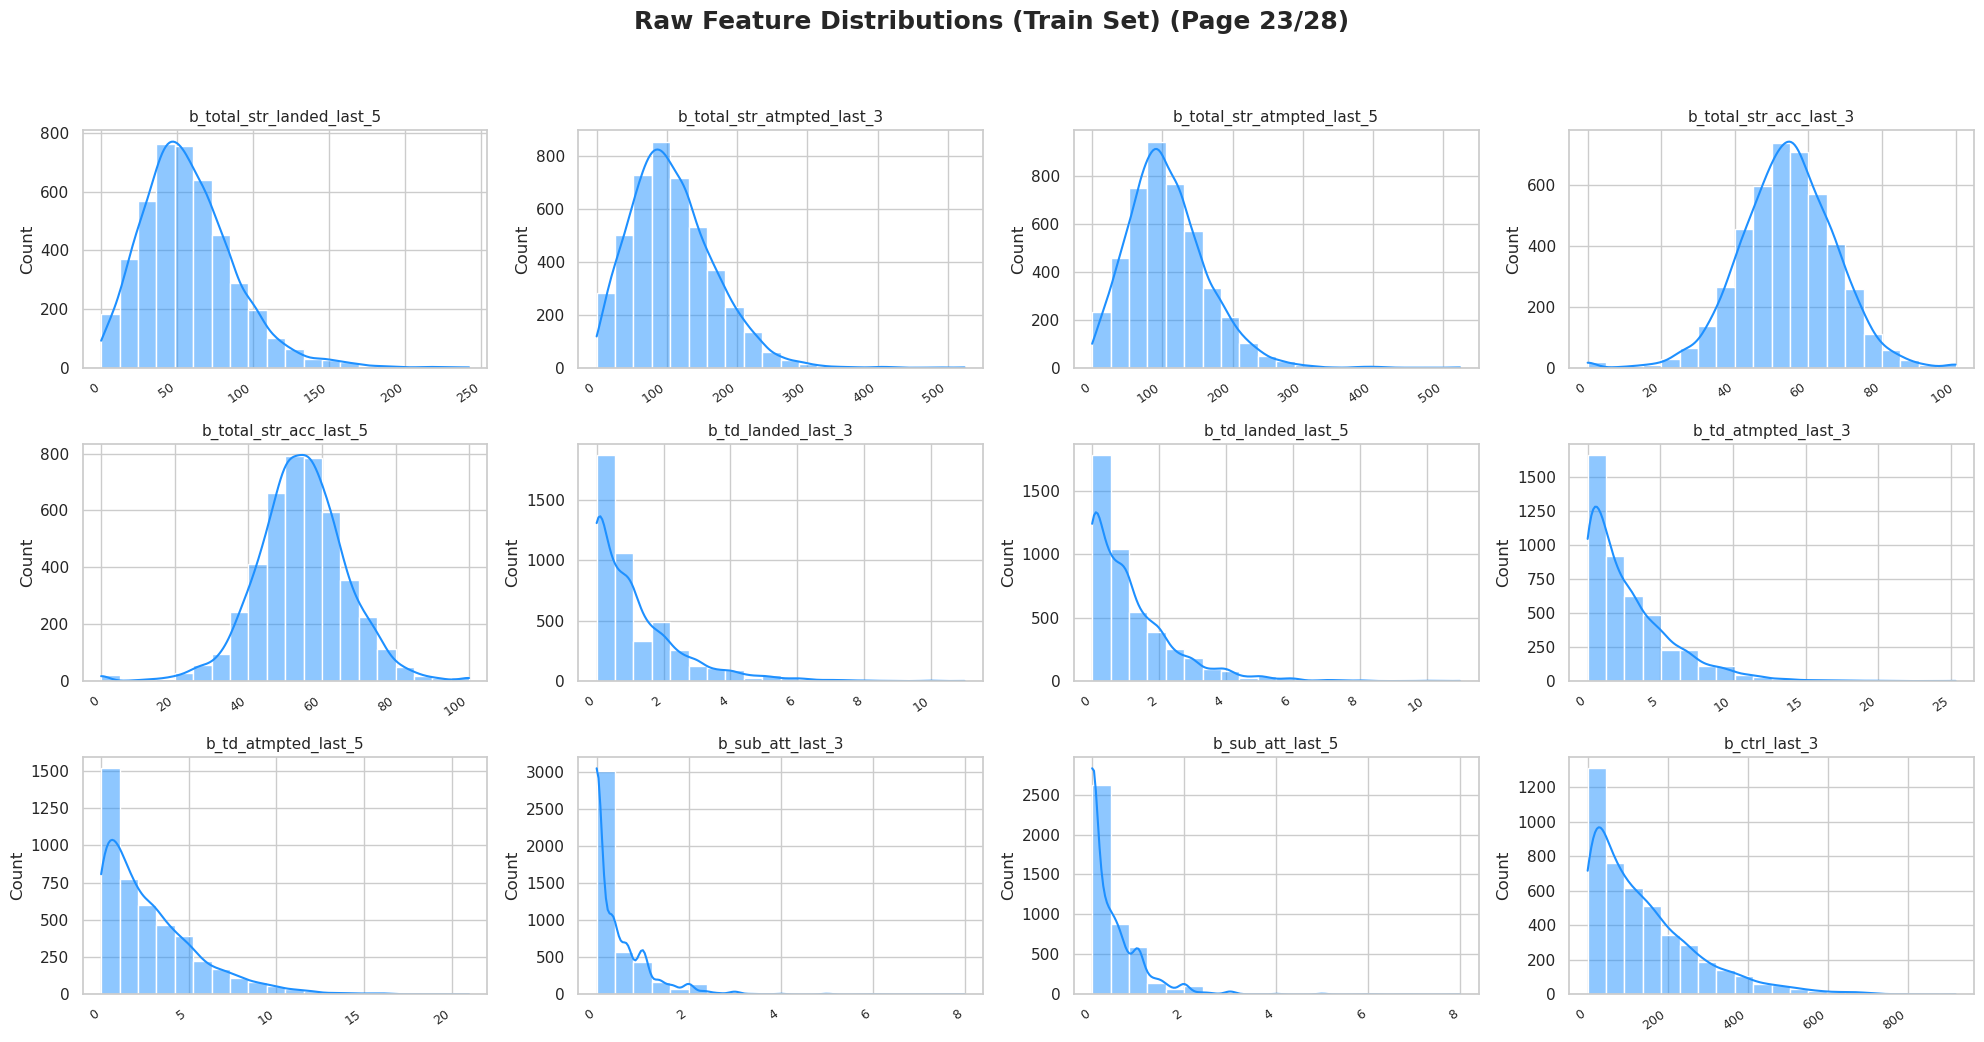

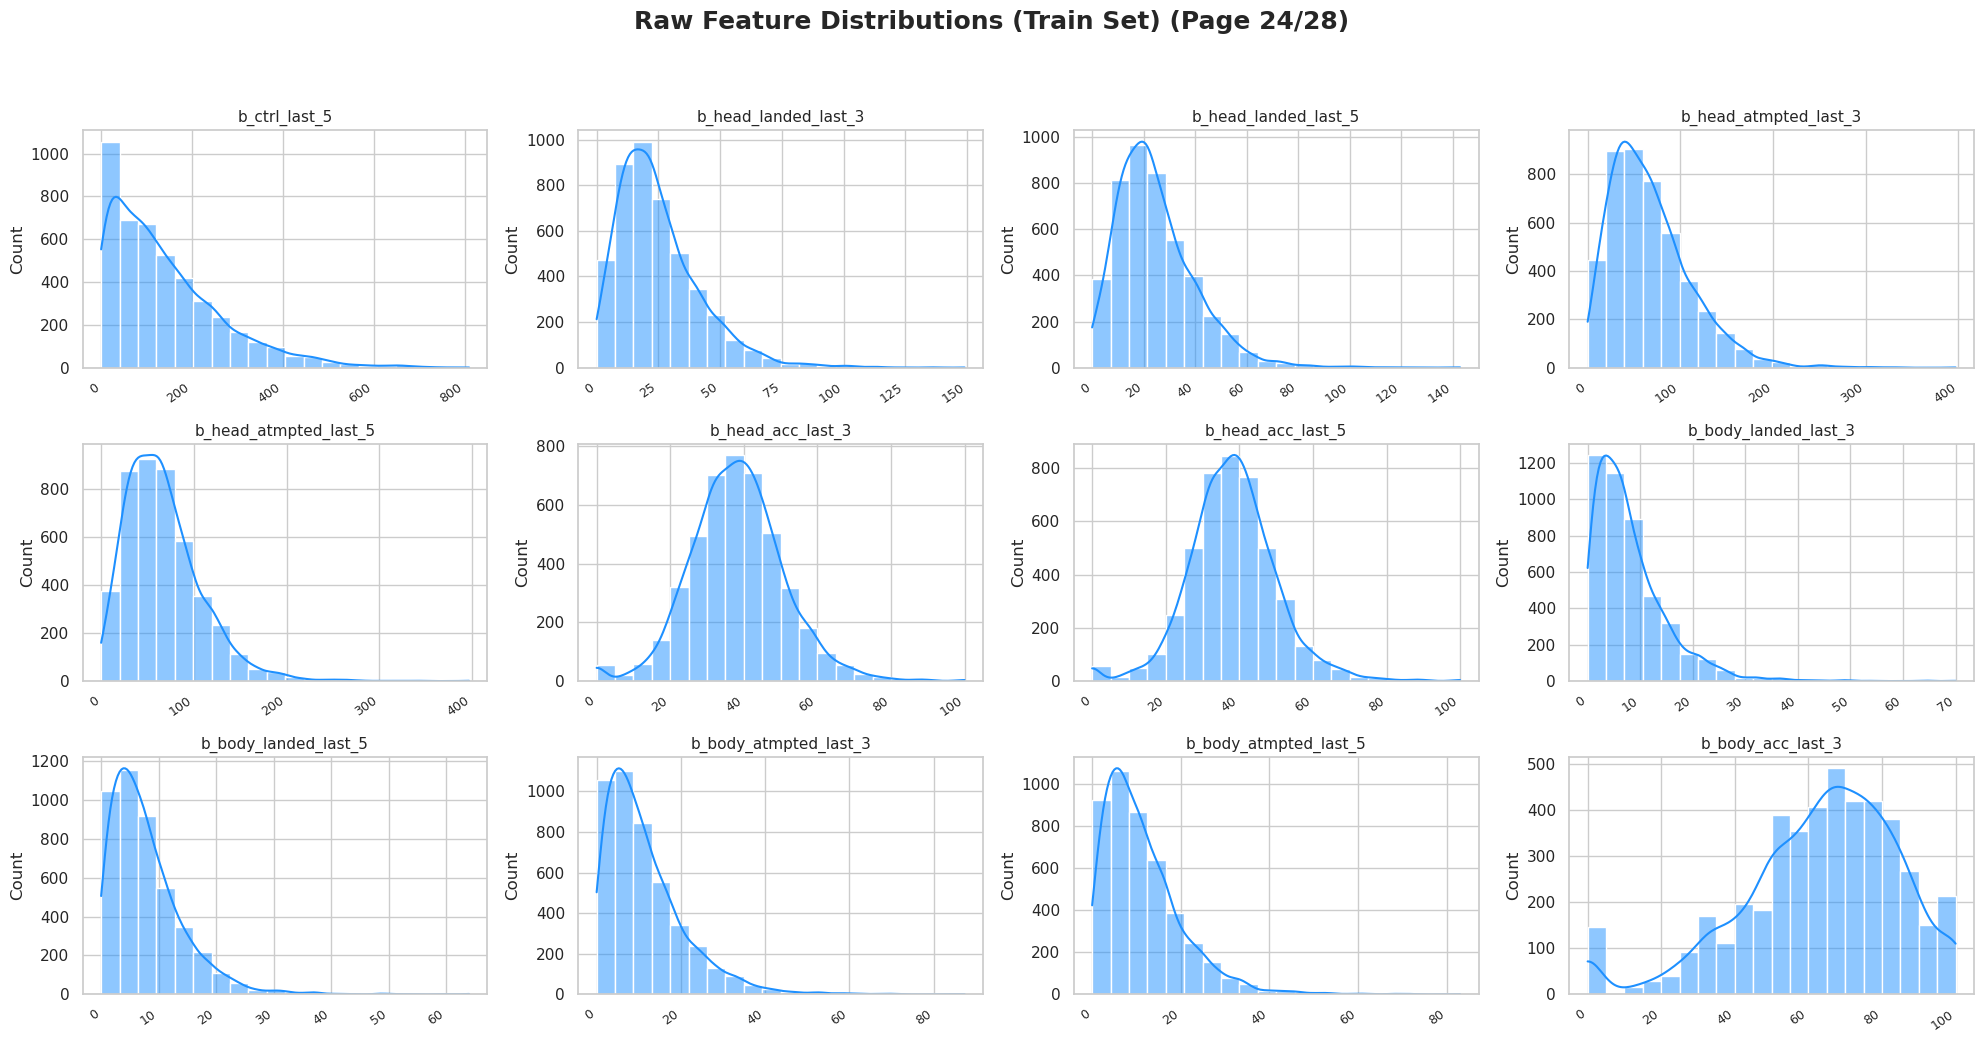

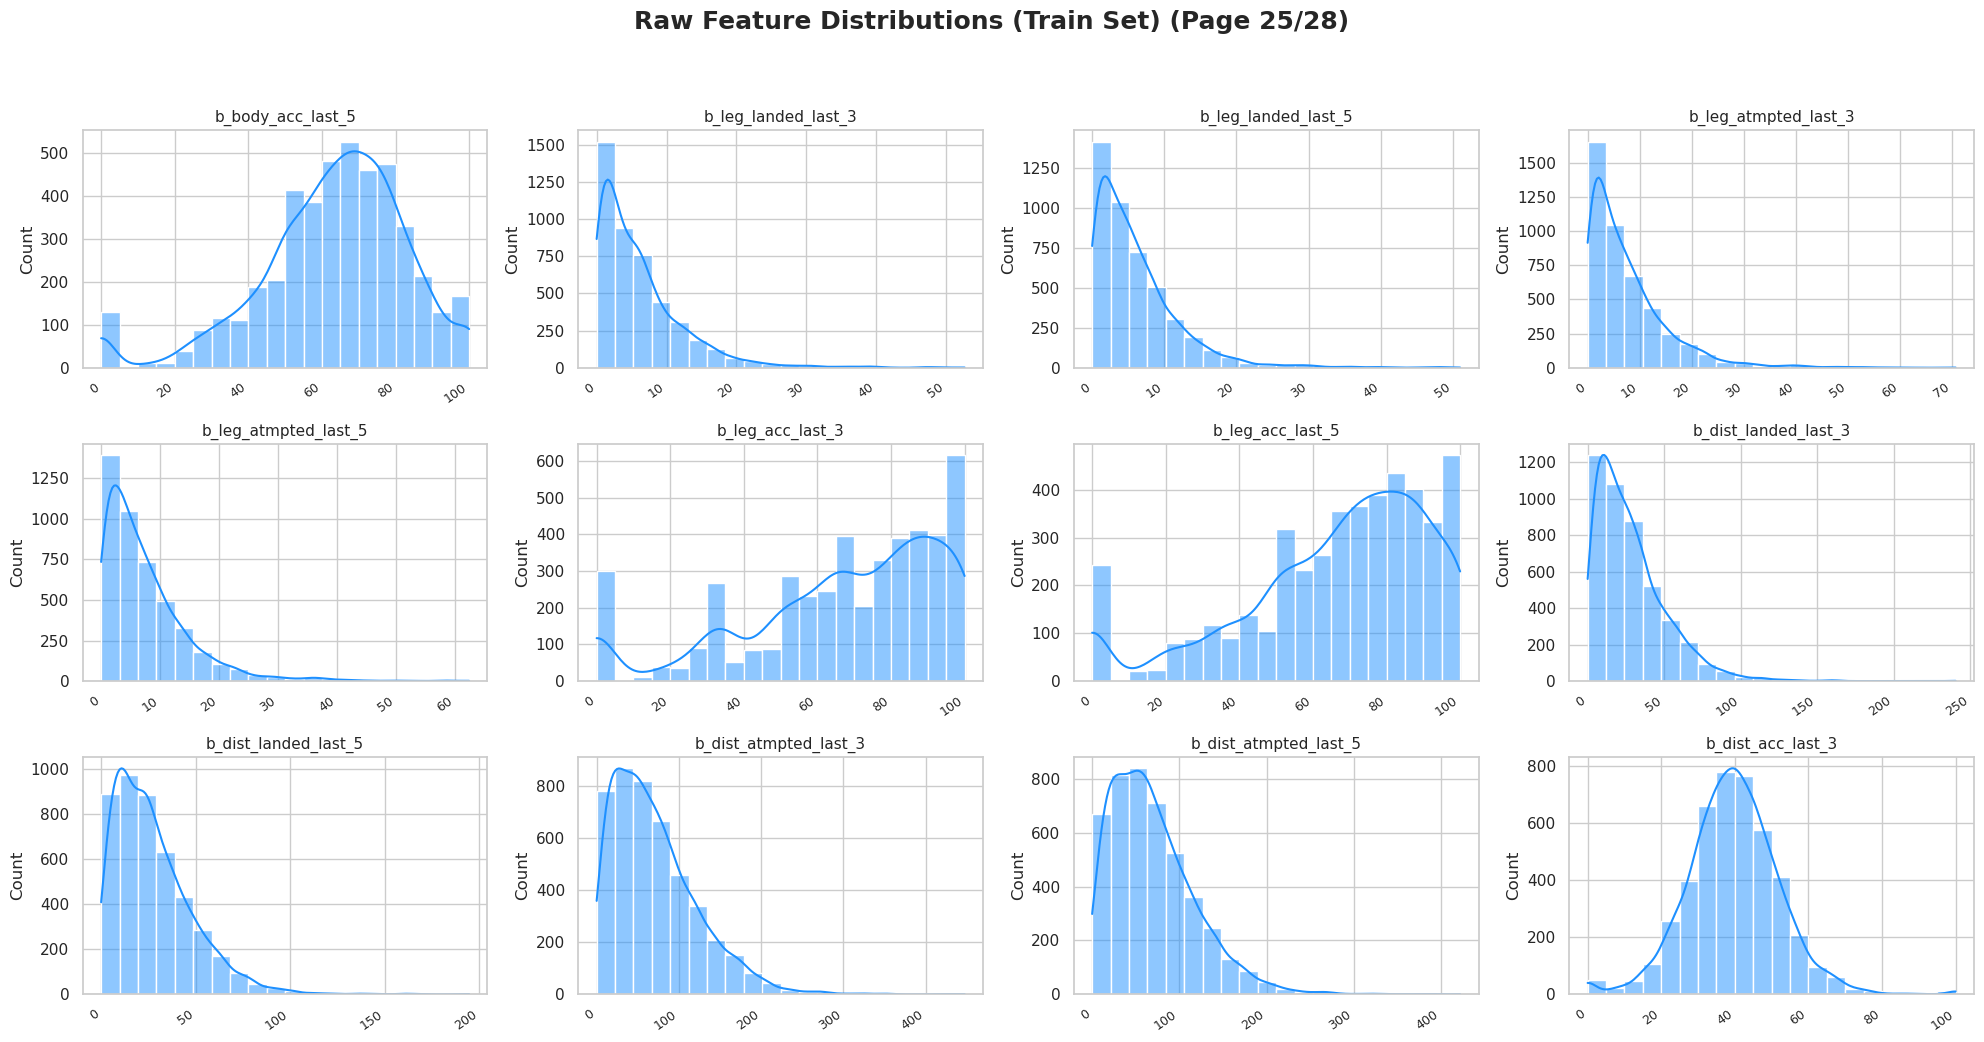

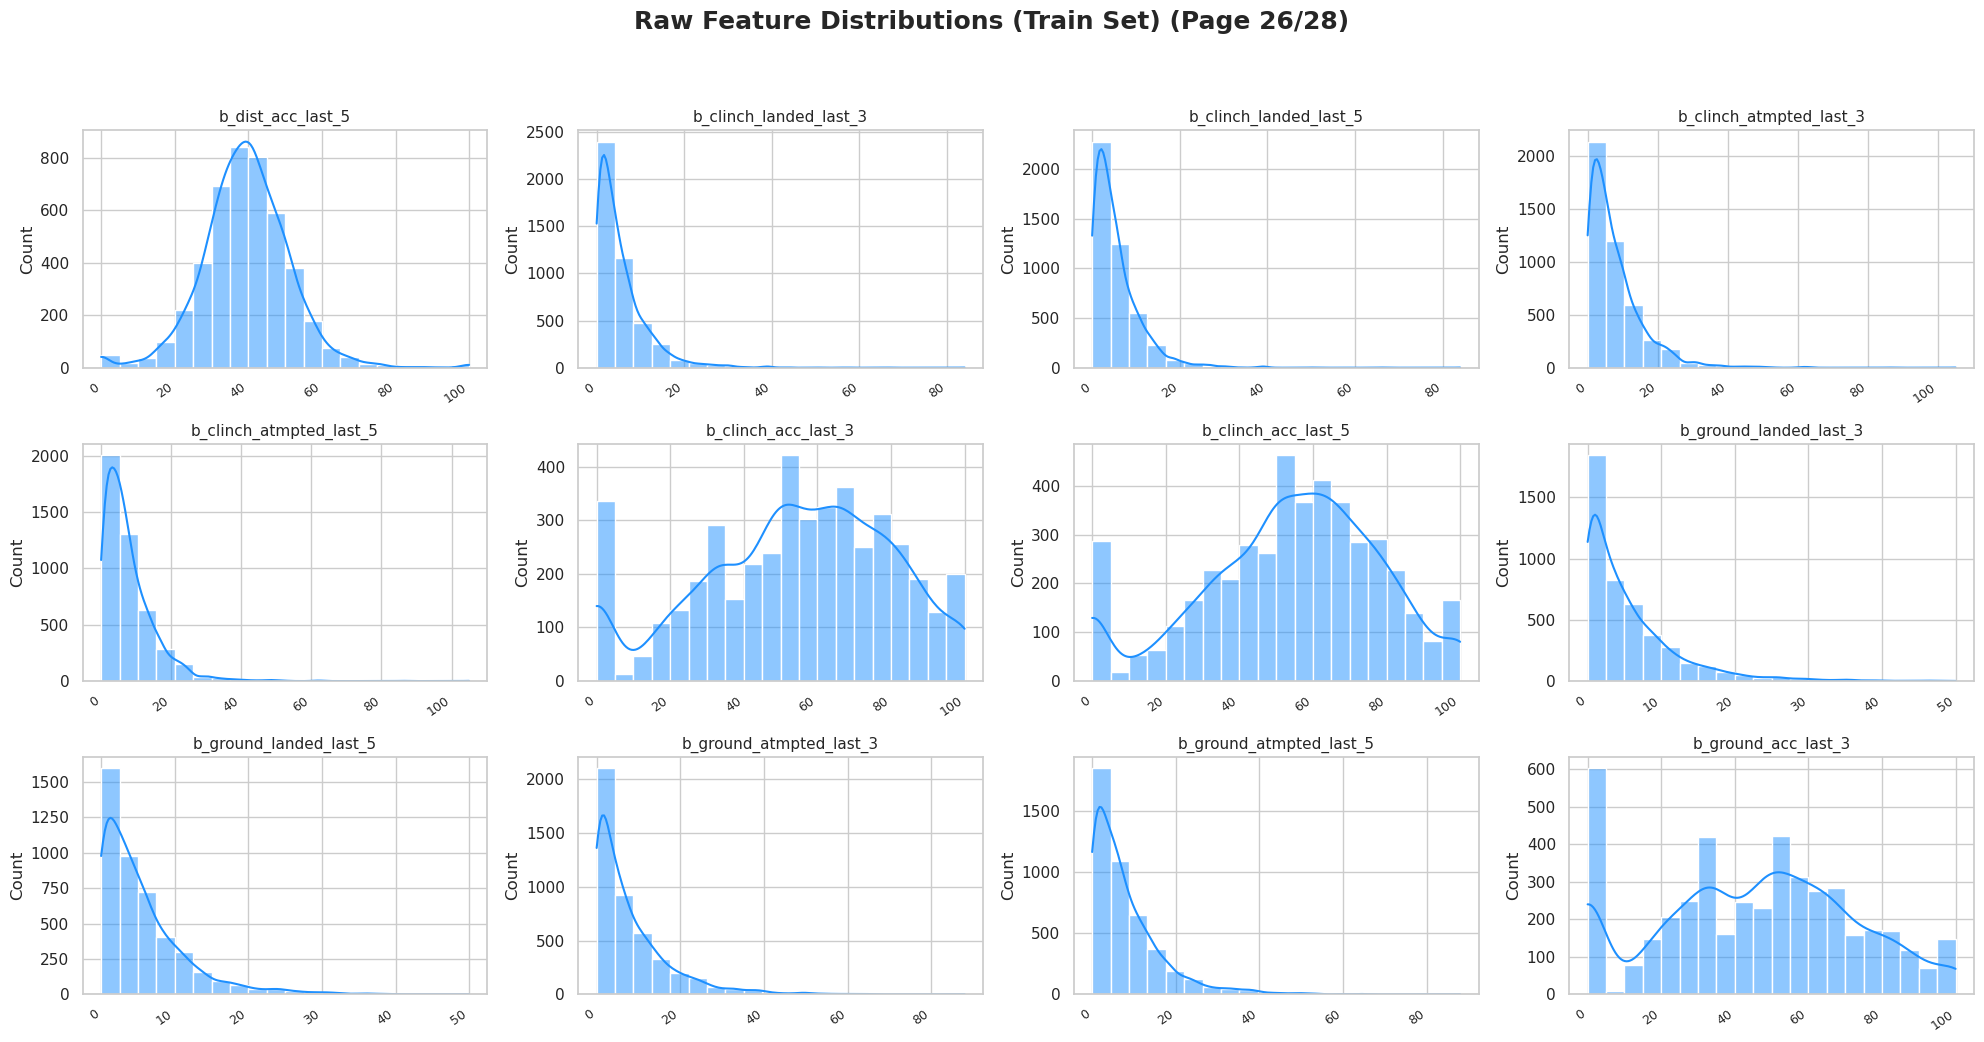

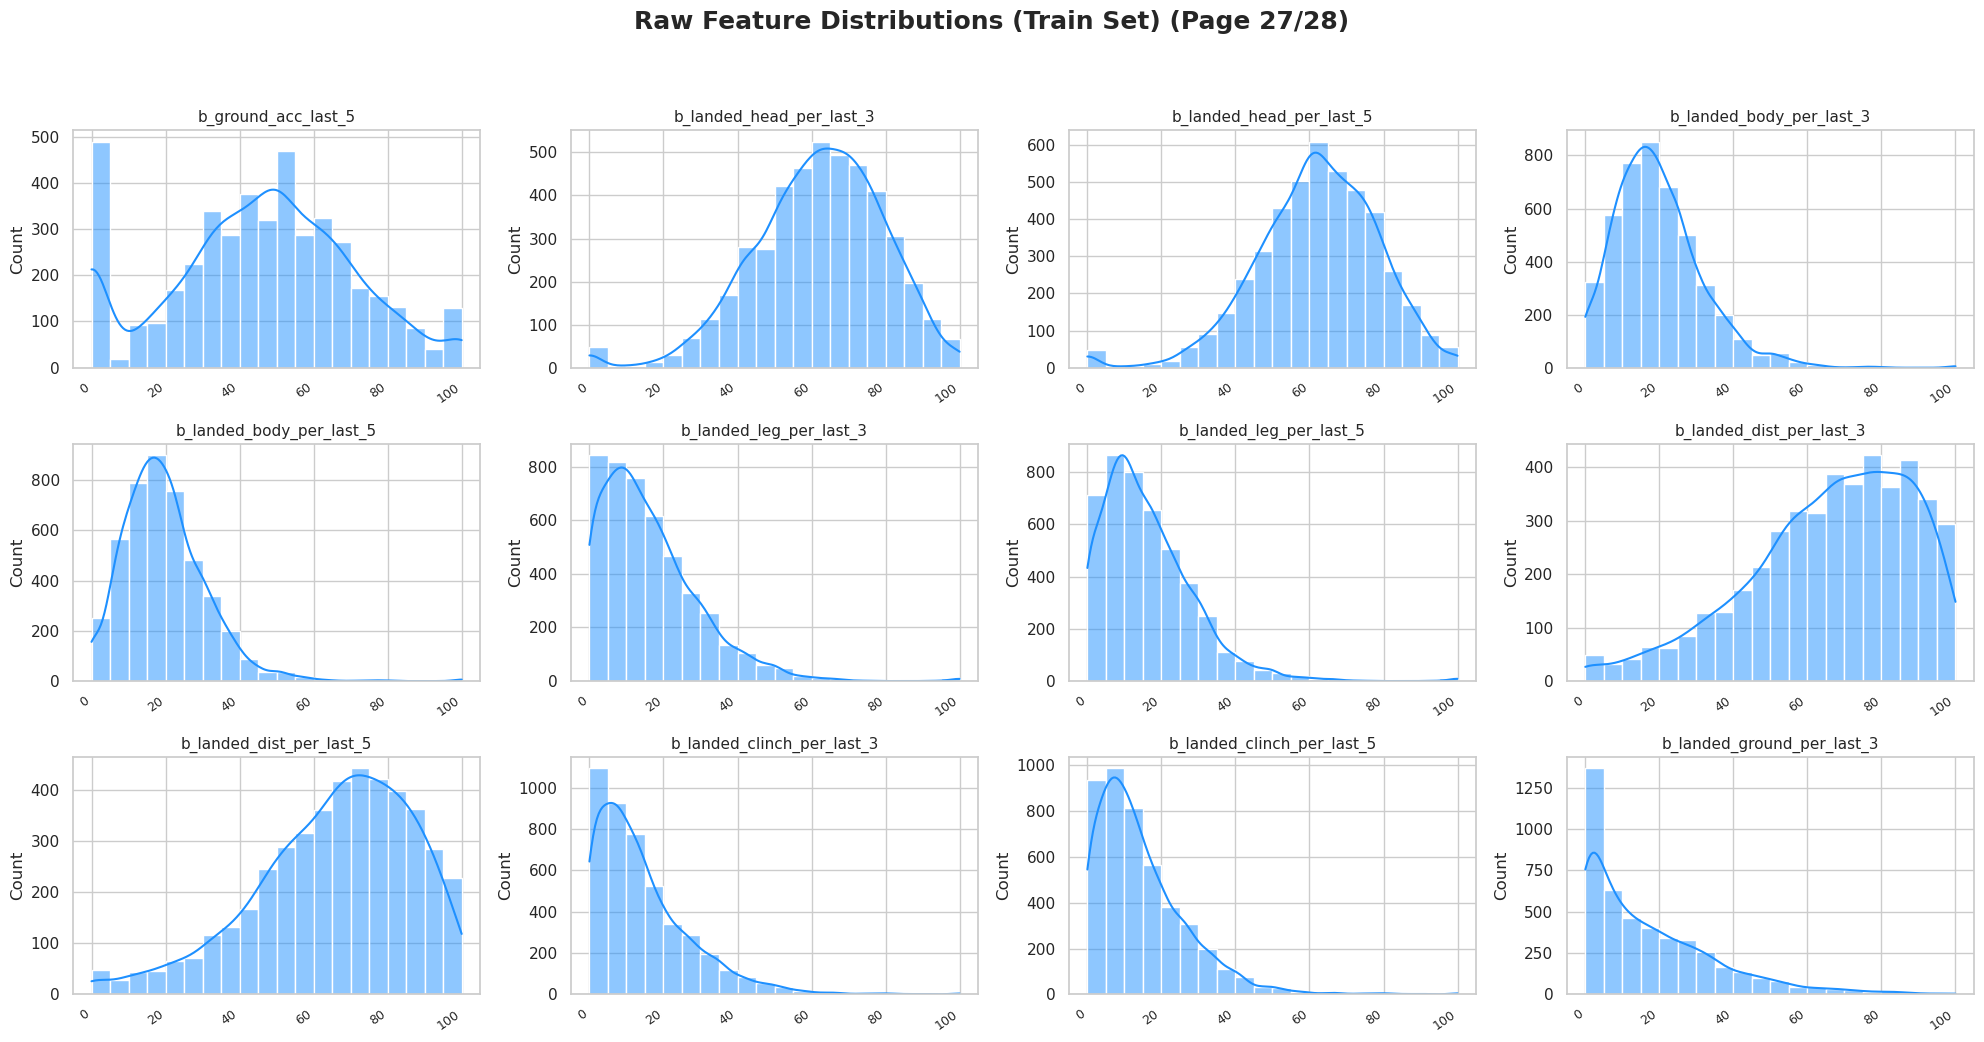

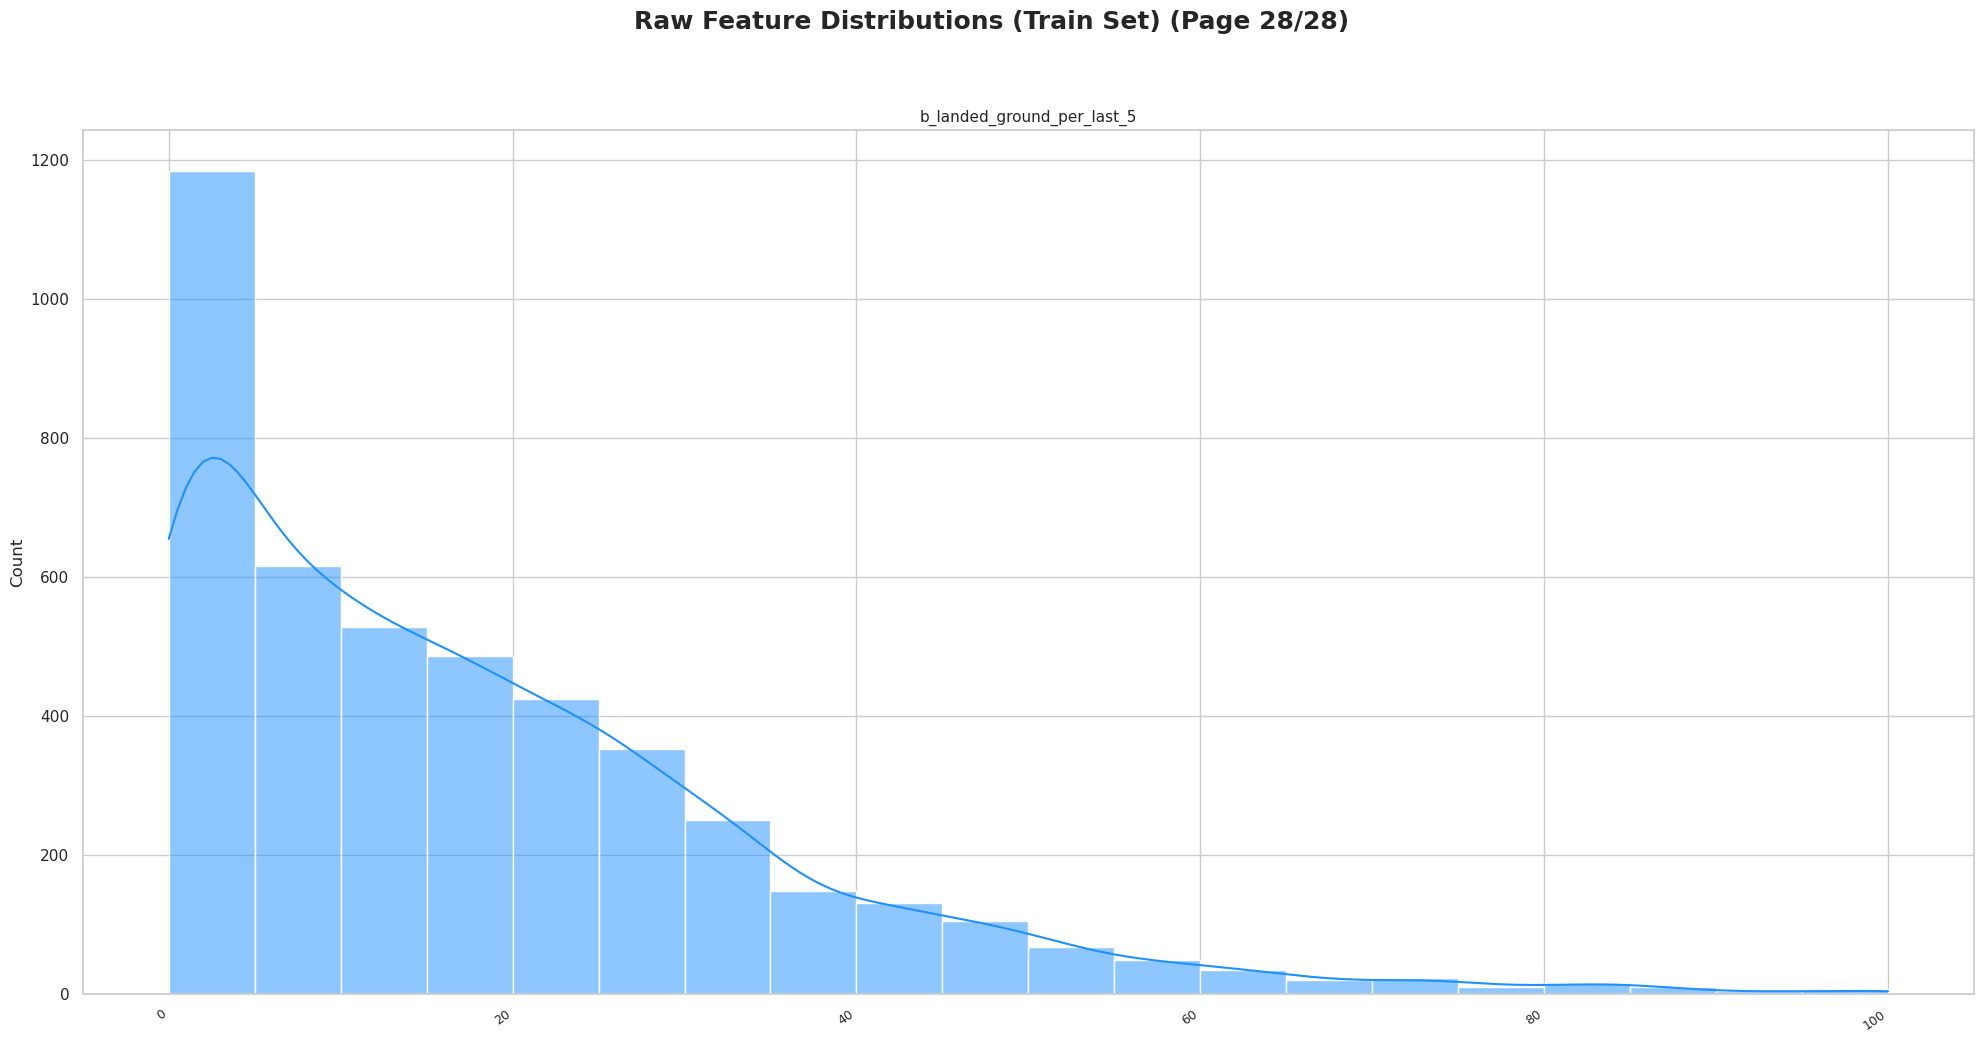

In [6]:
# Histograms of the predictor features
ufc_data.plot_feature_distributions(numeric_only=True)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## Correlation Between Features

In [9]:
ufc_data.compute_corr()

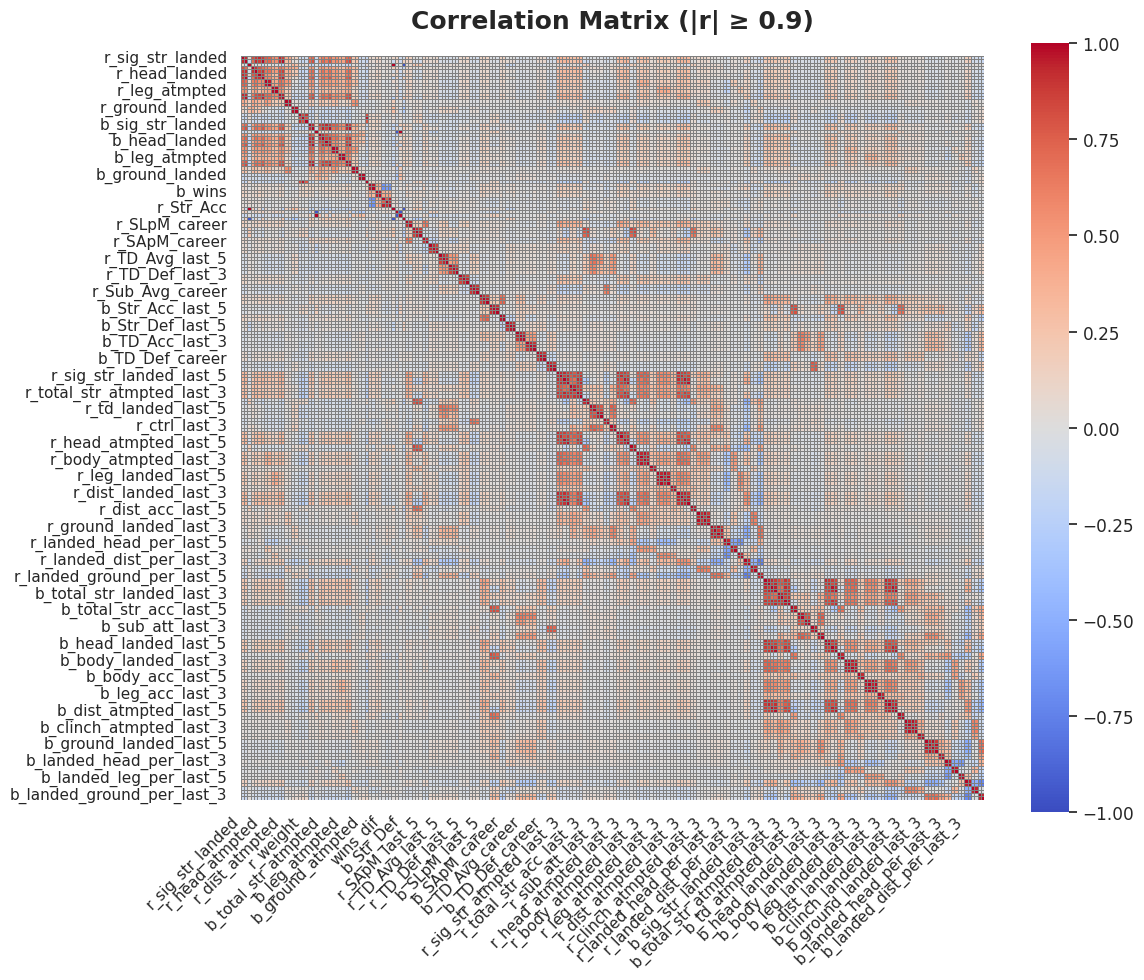

In [10]:
ufc_data.plot_corr(threshold = 0.9)

<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>